**Retail Sales Optimization: Insights & Strategies**

**Project submission by - Manasi Jha**

### Ask 1: Identifying the dataset

For this project, I considered a dataset about sales in the retail market, especially in supermarket stores, from August 4, 2023 to March 15, 2024. This dataset contains sales information from four stores of one of the retailers over 25 months. Additionally, the dataset includes a holdout sample with sales data for a 1-month period for which forecasts should be provided. You can download the dataset in the CSV format [here](https://www.kaggle.com/datasets/svizor/retail-sales-forecasting-data). The dataset’s size is 210 MB and was last updated on November 1, 2024. It has 7 .csv files namely catalog.csv, discounts_history.csv, markdowns.csv, online.csv, price_history.csv, sales.csv, and stores.csv. 

**Dataset Source**

This dataset is sourced from Kaggle, a popular platform for data science and machine learning resources including datasets from multiple fields and industries. The specific dataset can be accessed at the link provided above.

**Why this dataset is important for analysis**

Accurate demand forecasting is vital for efficient inventory management, reducing stock outs or overstock situations, and enhancing customer satisfaction. This dataset provides a real-world scenario for applying and testing various forecasting models, making it valuable for both academic research and practical applications in retail analytics.

There are several reasons why our group chose this dataset. Most importantly, all team members in our group are interested in the retail market and as future business analysts, it is highly valuable for us to explore practical data from the retail industry to analyze and udnerstand the different components that come into play in this field. Through the process of data modeling and analysis of this dataset, each team member will be able to understand sales in the retail market better and have the opportunity to find innovative solutions to problems in this industry. Therefore, this exercise will significantly improve our understanding and data modeling skills. Lastly, this dataset contains information about various sectors of the supermarket sales in a considerably tidy format, reasonable dimensions, and data description, making it a great data source for the group to model and analyze. 

**Is this dataset suitable for dimensional modeling and analytical analysis?**

This dataset has clear numerical fields for the fact tables and a variety of categorical attributes for our dimension tables. Since many categorical attributes are represented under code form, it will be easier to sort and work with. Moreover, some attributes have the potential to form derived attributes such as ZIP and RULING for better performance. All of these qualities combined makes this dataset suitable for modeling and analysis. To further determine its suitability for analysis, initial exploration involves loading the data, inspecting its structure, cleaning missing values, and transforming data formats.

**Analytical questions that can be answered with this data**

Three key analytical questions that can be answered with this dataset include: comparing online and in-store sales across different locations, evaluating sales trends over time to identify increases or decreases, and analyzing the performance of a specific promotion across different stores. These questions will help uncover insights about regional sales performance, time-based trends, and the effectiveness of promotional strategies.
                                                                
**Concerns with the data and changes we expect to overcome**

Concerns with the dataset include missing values, mismatched granularity, and the absence of external context data. These issues can be addressed by using imputation techniques, adjusting data granularity, and integrating external datasets to provide a comprehensive analysis. To overcome these challenges, we will conduct thorough data wrangling to ensure clean data that is readable and provides valuable insights. Furthermore, due to the large size of the dataset, we anticipate the processing time for the code blocks to be time consuming. 

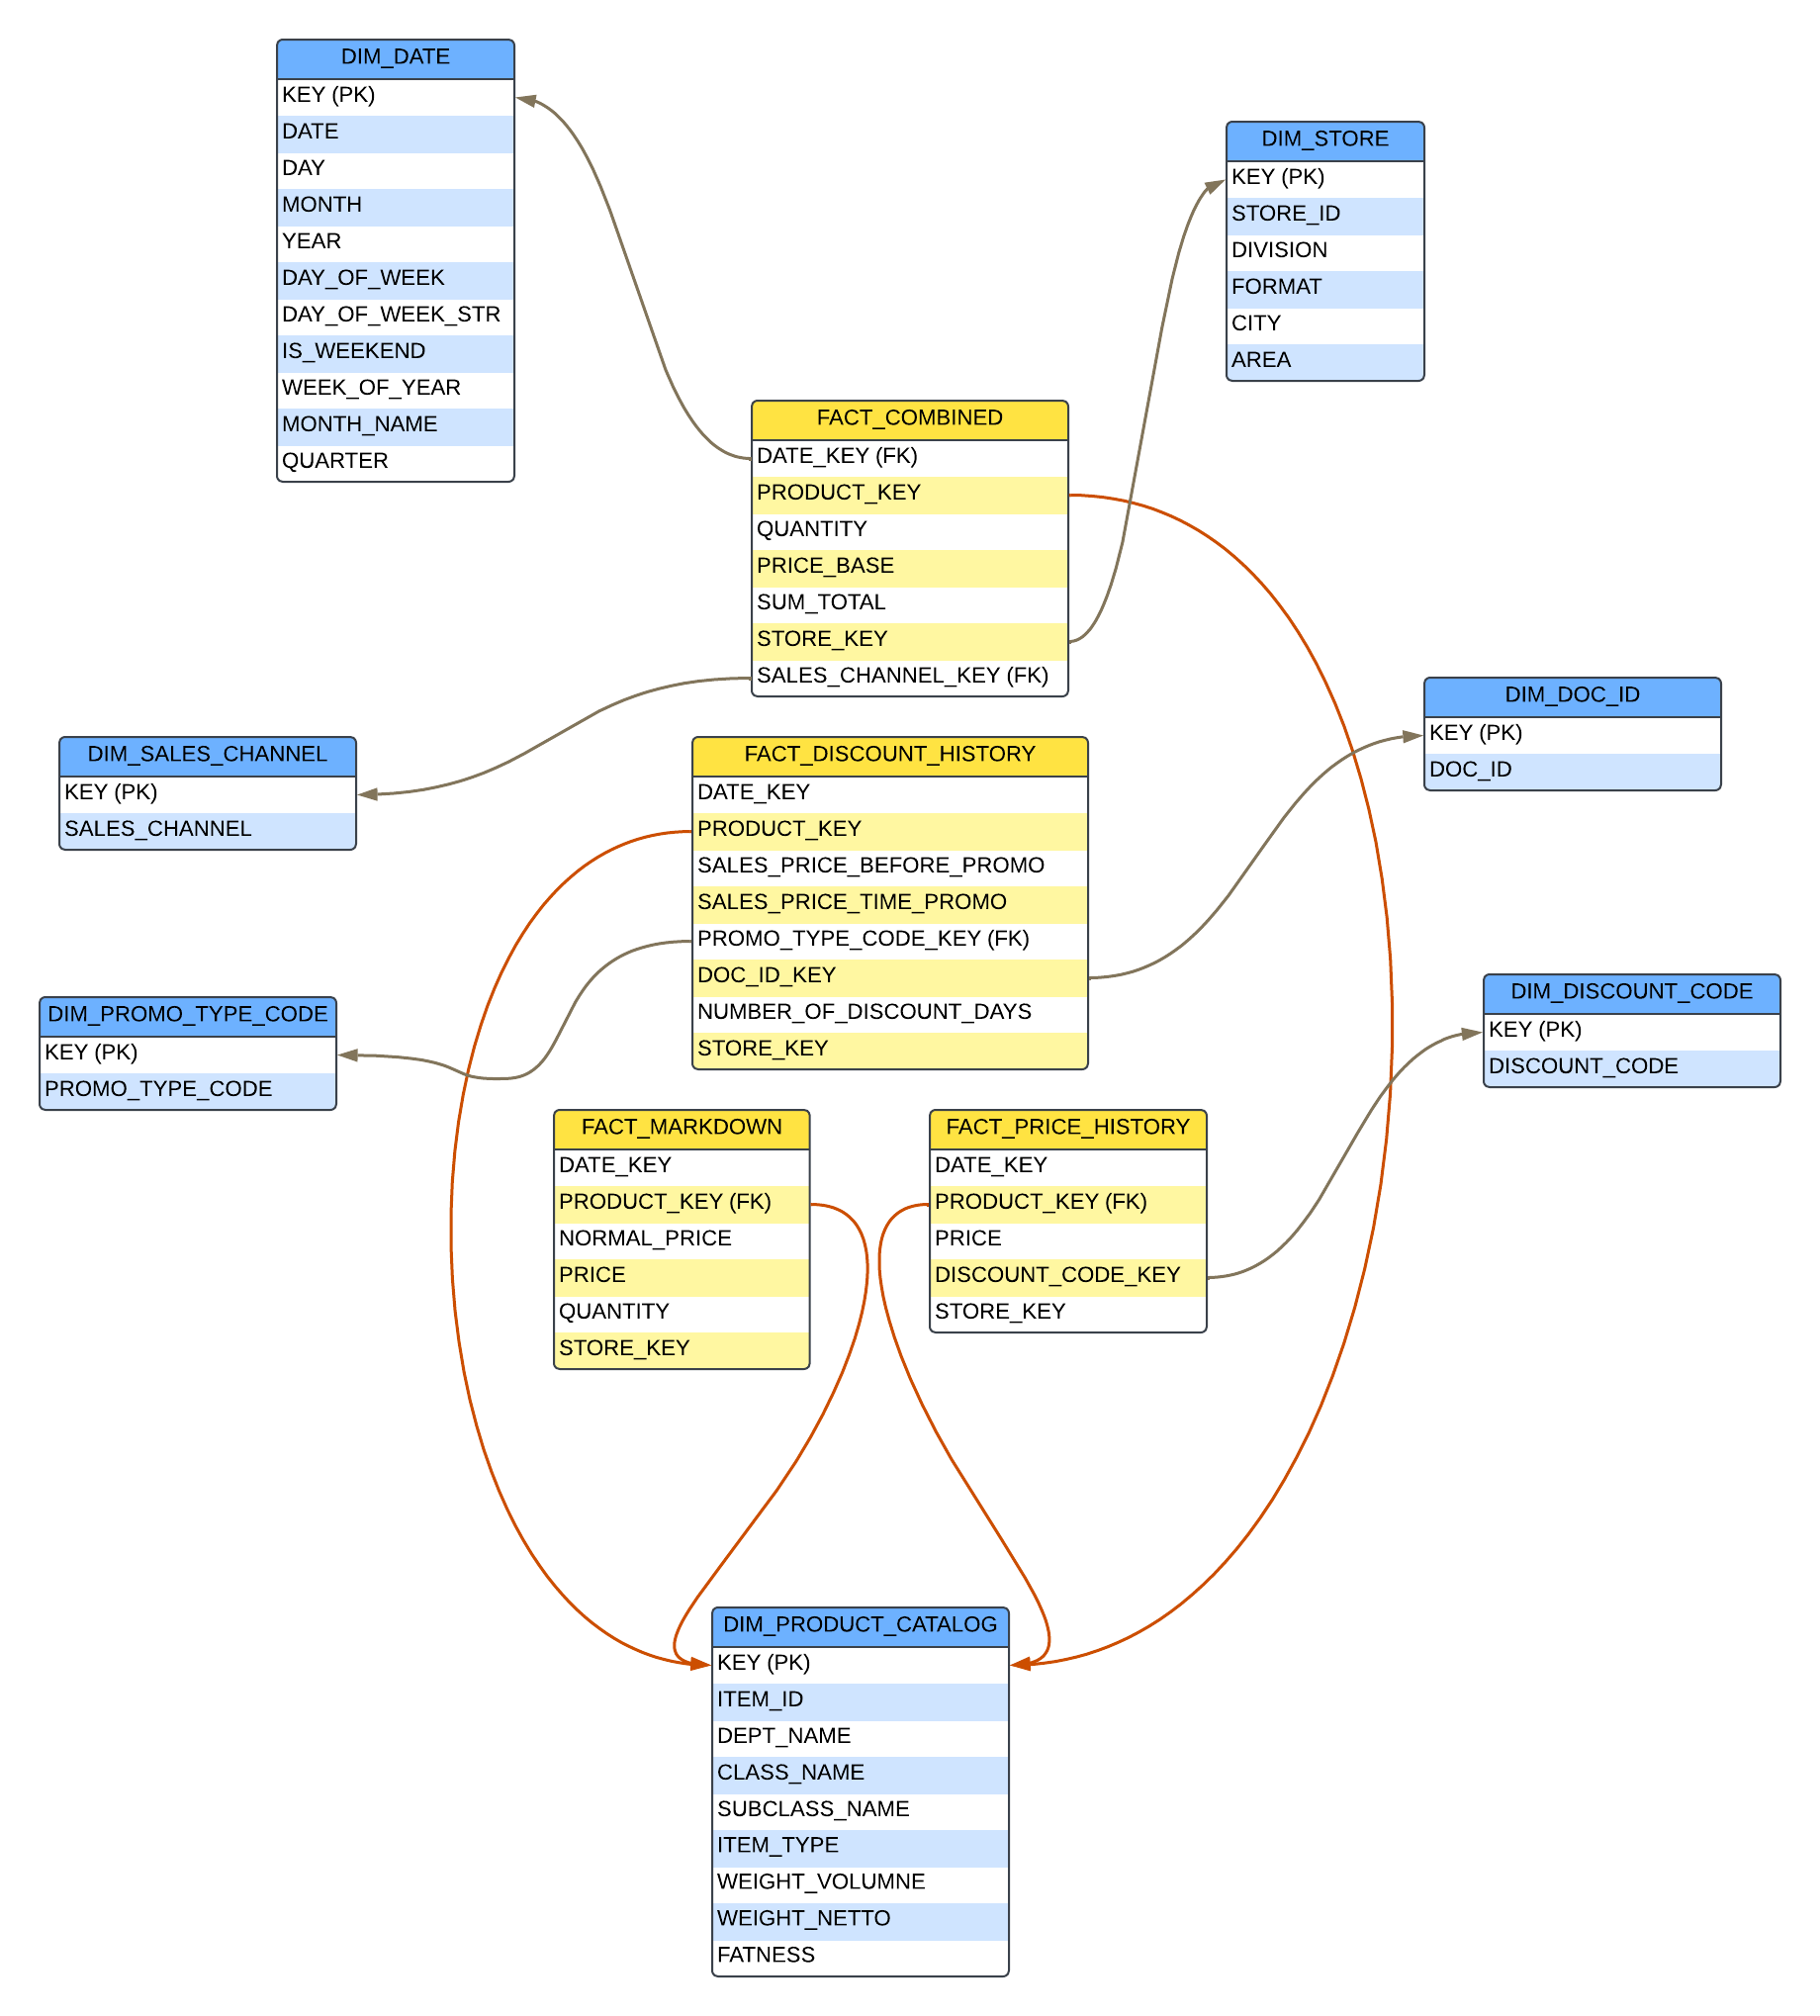

### Explanation of Database Schema

#### **Dimension Tables:**
1. **`DIM_DATE`**:
   - Contains details about dates, such as the full date, day of the week, month, year, quarter, and whether it is a weekend. This table is connected to several fact tables via the `DATE_KEY`.
   - **Primary Key**: `KEY`
   
2. **`DIM_SALES_CHANNEL`**:
   - Stores the sales channel information, such as "Online" or "In-Store". This table is connected to `FACT_COMBINED` via the `SALES_CHANNEL_KEY`.
   - **Primary Key**: `KEY`
   
3. **`DIM_STORE`**:
   - Contains store-related details like `STORE_ID`, `DIVISION`, `FORMAT`, `CITY`, and `AREA`. This is linked to multiple fact tables via the `STORE_KEY`.
   - **Primary Key**: `KEY`
   
4. **`DIM_DOC_ID`**:
   - Stores document IDs, which are associated with discount history. The `DOC_ID_KEY` is used to link this dimension to the `FACT_DISCOUNT_HISTORY`.
   - **Primary Key**: `KEY`
   
5. **`DIM_PROMO_TYPE_CODE`**:
   - Contains promotional type codes, such as "Discount" or "Buy One Get One". This is connected to `FACT_DISCOUNT_HISTORY` through the `PROMO_TYPE_CODE_KEY`.
   - **Primary Key**: `KEY`
   
6. **`DIM_DISCOUNT_CODE`**:
   - Stores the discount codes used in the history records. It is linked to the `FACT_PRICE_HISTORY` table by `DISCOUNT_CODE_KEY`.
   - **Primary Key**: `KEY`
   
7. **`DIM_PRODUCT_CATALOG`**:
   - Contains detailed information about the products, including `ITEM_ID`, `DEPT_NAME`, `CLASS_NAME`, and attributes such as `WEIGHT_VOLUME` and `FATNESS`. This dimension is linked to multiple fact tables like `FACT_COMBINED`, `FACT_MARKDOWN`, and `FACT_PRICE_HISTORY` via the `PRODUCT_KEY`.
   - **Primary Key**: `KEY`

#### **Fact Tables:**
1. **`FACT_COMBINED`**:
   - This fact table contains sales transaction data, including quantity, price base, total sales, and links to `DIM_DATE`, `DIM_PRODUCT_CATALOG`, `DIM_SALES_CHANNEL`, and `DIM_STORE` through their respective foreign keys.
   - **Foreign Keys**: `DATE_KEY`, `PRODUCT_KEY`, `SALES_CHANNEL_KEY`, `STORE_KEY`
   
2. **`FACT_DISCOUNT_HISTORY`**:
   - Contains information related to discounts applied to products, including price before and during promotions, the number of discount days, and related promotion and document information. It links to `DIM_DATE`, `DIM_PRODUCT_CATALOG`, `DIM_PROMO_TYPE_CODE`, `DIM_DOC_ID`, and `DIM_STORE`.
   - **Foreign Keys**: `DATE_KEY`, `PRODUCT_KEY`, `PROMO_TYPE_CODE_KEY`, `DOC_ID_KEY`, `STORE_KEY`
   
3. **`FACT_MARKDOWN`**:
   - Stores data on markdown pricing for products, including the original and markdown prices, quantity sold, and store information. It connects to `DIM_DATE`, `DIM_PRODUCT_CATALOG`, and `DIM_STORE`.
   - **Foreign Keys**: `DATE_KEY`, `PRODUCT_KEY`, `STORE_KEY`
   
4. **`FACT_PRICE_HISTORY`**:
   - Contains price data for products over time, including the base price and any discount codes applied. It links to `DIM_DATE`, `DIM_PRODUCT_CATALOG`, `DIM_DISCOUNT_CODE`, and `DIM_STORE`.
   - **Foreign Keys**: `DATE_KEY`, `PRODUCT_KEY`, `DISCOUNT_CODE_KEY`, `STORE_KEY`

#### **Relationships:**
- **Fact-to-Dimension Relationship**:
  - Each fact table is connected to various dimension tables via foreign keys. For example, `FACT_COMBINED` connects to `DIM_DATE`, `DIM_PRODUCT_CATALOG`, `DIM_SALES_CHANNEL`, and `DIM_STORE`.
  
- **Primary Key-Secondary Key Relationship**:
  - Each dimension table has a primary key (e.g., `KEY`) and the fact tables use the corresponding foreign key (e.g., `DATE_KEY`, `PRODUCT_KEY`) to reference data from the dimensions.

### Ask 2: Data Wrangling and Dimensional Modeling

To begin with, we use a shell command !pwd which stands for "print working directory" and displays the current directory path where the notebook or script is being executed. This is useful for understanding the current context in the file system, especially if there is a need to navigate to the correct directory to read or write files. 

In [1]:
!pwd

/home/ubuntu


We are going to use [PostgreSQL](https://www.postgresql.org) 12 or a later version for this proejct. If postgresql is not installed, it can be installed by following the [instructions](https://www.postgresql.org/download/linux/) here. In order to connect to PostgreSQL, we need to make sure the [ipython-sql](https://github.com/catherinedevlin/ipython-sql) and [psycopg2](https://github.com/psycopg/psycopg2) libraries are installed using the code below.

In [2]:
!pip freeze | grep -E 'ipython-sql|psycopg2'

psycopg2==2.9.9
types-psycopg2==2.9


First, we are going to use PostgreSQL's `dropdb` command to drop the database named final_project, if it exists. This step is necessary so that we can run this notebook repeatedly. If you get the error that says "database final_project does not exist", that is fine. However, if the output says that "There is 1 other session using the database", please restart the Kernel and try it again.

In [3]:
!dropdb -U postgres final_project

dropdb: error: database removal failed: ERROR:  database "final_project" does not exist


Now use PostgreSQL's `createdb` command to create the database named final_project. 

In [4]:
!createdb -U postgres final_project

The code below allows you to execute SQL queries in this Jyupter notebook.

In [3]:
%load_ext sql

This line of code uses the %sql magic command to connect to the final_project database using PostgreSQL. It connects with the username postgres and does not require a password, as indicated by the URL format. The connection assumes that the PostgreSQL server is running locally (default host and port).

In [5]:
%sql postgresql://postgres@/final_project

The first step would be to download the ZIP files provided in the Kaggle website named 'archive.zip', link below, and make sure that they are in the current directory. Then, we are going to unzip said files, clean up the data and import it into each associated table, which we will create soon. 

*Link to the Kaggle dataset:* https://www.kaggle.com/datasets/svizor/retail-sales-forecasting-data

In [7]:
!pwd

/home/ubuntu


In [8]:
!unzip archive.zip

Archive:  archive.zip
  inflating: catalog.csv             
  inflating: discounts_history.csv   
  inflating: markdowns.csv           
  inflating: online.csv              
  inflating: price_history.csv       
  inflating: sales.csv               
  inflating: stores.csv              


The code below counts the number of rows in each unzipped csv file (sales.csv, online.csv, markdowns.csv, price_history.csv, discounts_history.csv, stores.csv, and catalog.csv) for later reference and validation. 

The row count for csv files is performed by using wc (short for word count) with the -l option which is a command in Unix to count the number of rows in each of the files Sales, Online, Markdowns, Price History, Discounts History, Stores, and Catalog.

In [9]:
!wc -l sales.csv

7432686 sales.csv


In [10]:
!wc -l online.csv

1123413 online.csv


In [11]:
!wc -l markdowns.csv

8980 markdowns.csv


In [12]:
!wc -l price_history.csv

698627 price_history.csv


In [13]:
!wc -l discounts_history.csv

3746745 discounts_history.csv


In [14]:
!wc -l stores.csv

5 stores.csv


In [15]:
!wc -l catalog.csv

219811 catalog.csv


We will now utilize the !csvclean -n command to verify that the datasets are error-free and prepared for analysis.

In [16]:
!csvclean -n sales.csv
!csvclean -n online.csv
!csvclean -n markdowns.csv
!csvclean -n price_history.csv
!csvclean -n discounts_history.csv
!csvclean -n stores.csv
!csvclean -n catalog.csv

No errors.
No errors.
No errors.
No errors.
No errors.
No errors.
No errors.


You should see 7 statements indicating 'No errors.' printed from the command above confirming that the datasets are error-free.

Now that the files have been extracted, the code below will delete the original archive.zip file to eliminate unnecessary files.

In [17]:
!rm -r archive.zip

### SQL Code: Create `fact_sales` Table

This SQL code first checks if a table named `fact_sales` exists and drops it if necessary, ensuring there are no conflicts when creating a new table. Then, a new table `fact_sales` is created with the following columns:

- `row_id`: A unique identifier for each row, using the `BIGINT` data type for large integers.
- `date`: The date of the transaction, using the `DATE` data type.
- `item_id`: A textual identifier for the item being sold, represented as `TEXT`.
- `quantity`: The number of items sold, stored as a `NUMERIC` type to handle fractional values.
- `price_base`: The base price of the item, stored as `NUMERIC`.
- `sum_total`: The total price for the transaction (calculated as `quantity * price_base`), also stored as `NUMERIC`.
- `store_id`: The identifier for the store where the transaction took place, stored as an `INT`.

This table structure is designed to track sales transactions, including quantities, pricing, and the stores involved.


In [4]:
%%sql

DROP TABLE IF EXISTS fact_sales;

CREATE TABLE fact_sales (
    row_id BIGINT,
    date DATE,
    item_id TEXT,
    quantity NUMERIC,
    price_base NUMERIC,
    sum_total NUMERIC,
    store_id INT
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Import Data from CSV to `fact_sales` Table

This SQL code uses the `COPY` command to load data from a CSV file into the `fact_sales` table. Here's a breakdown of the command:

- `COPY fact_sales`: Specifies that data will be copied into the `fact_sales` table.
- `FROM '/home/ubuntu/sales.csv'`: Indicates the location of the CSV file (`sales.csv`) on the system, which contains the data to be imported.
- `CSV`: Specifies the format of the file being imported (in this case, CSV).
- `HEADER`: Tells the `COPY` command that the first row in the CSV file contains the column headers, so it should not be treated as data.

This command efficiently loads the sales data into the table, assuming the CSV file structure matches the table schema.

In [5]:
%%sql

COPY fact_sales FROM '/home/ubuntu/sales.csv'
CSV
HEADER;

Running query in 'postgresql://postgres@/final_project'

7432685 rows affected.

++
||
++
++

**Data Validation**

- fact_sales Table
- Source File: sales.csv
- Total Rows in sales.csv: 7,432,686

Ensured that the total number of rows in the fact_sales table corresponds to the total number of rows in the sales.csv file.

### SQL Code: Retrieve All Data from `fact_sales` Table

This SQL query retrieves all records from the `fact_sales` table:

- `SELECT *`: Selects all columns from the table.
- `FROM fact_sales`: Specifies the `fact_sales` table as the source for the data.

This query is useful for viewing the complete dataset within the table, including all rows and columns that were loaded from the CSV file. It provides a full snapshot of the sales data.

In [7]:
%%sql

select * from fact_sales

Running query in 'postgresql://postgres@/final_project'

7432685 rows affected.

row_id,date,item_id,quantity,price_base,sum_total,store_id
0,2023-08-04,293375605257,1.0,47.86,47.86,1
1,2023-08-04,a66fdf2c0ae7,3.0,49.6,148.8,1
2,2023-08-04,daa46ef49b7a,0.822,379.0,311.54,1
3,2023-08-04,a3b49c1bf758,1.0,129.0,129.0,1
4,2023-08-04,ab611c5cef62,7.0,79.9,559.3,1
5,2023-08-04,be3b7250209f,1.0,129.9,129.9,1
6,2023-08-04,651c34ed4958,1.0,89.9,89.9,1
7,2023-08-04,7390a33d7f34,2.0,119.9,239.8,1
8,2023-08-04,d2f975315972,1.0,89.9,89.9,1
9,2023-08-04,d788cc0f8e2a,5.0,159.9,799.5,1


### SQL Code: Create `fact_online` Table

This SQL code follows a similar structure to the previous table creation, but this time for a new table called `fact_online`. Here's the breakdown:

- `DROP TABLE IF EXISTS fact_online`: Ensures that the `fact_online` table is dropped if it already exists, preventing errors during creation.
- `CREATE TABLE fact_online`: Defines a new table named `fact_online`.
  
The columns in this table are the same as those in the `fact_sales` table:

- `row_id`: A unique identifier for each row, using `BIGINT`.
- `date`: The transaction date, using the `DATE` data type.
- `item_id`: The identifier for the item, stored as `TEXT`.
- `quantity`: The quantity of items sold, using `NUMERIC` to handle possible fractions.
- `price_base`: The base price of each item, also stored as `NUMERIC`.
- `sum_total`: The total price for the transaction (calculated as `quantity * price_base`), stored as `NUMERIC`.
- `store_id`: An integer identifier for the store where the sale occurred.

This table structure is designed for tracking online sales, similar to the previous table but potentially representing different sales channels.

In [8]:
%%sql

DROP TABLE IF EXISTS fact_online;

CREATE TABLE fact_online (
    row_id BIGINT,
    date DATE,
    item_id TEXT,
    quantity NUMERIC,
    price_base NUMERIC,
    sum_total NUMERIC,
    store_id INT
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Import Data from CSV to `fact_online` Table

This SQL command imports data from a CSV file into the `fact_online` table:

- `COPY fact_online`: Specifies the `fact_online` table as the target for the imported data.
- `FROM '/home/ubuntu/online.csv'`: Points to the location of the CSV file (`online.csv`) on the system.
- `CSV`: Indicates that the file format is CSV.
- `HEADER`: Specifies that the first row of the CSV file contains column headers, so it will be ignored during the import process.

This command is used to load online sales data into the table, ensuring the structure of the file matches the table schema.

In [9]:
%%sql

COPY fact_online FROM '/home/ubuntu/online.csv'
CSV
HEADER;

Running query in 'postgresql://postgres@/final_project'

1123412 rows affected.

++
||
++
++

**Data Validation**

- fact_online Table
- Source File: online.csv
- Total Rows in sales.csv: 1,123,412

Ensured that the total number of rows in the fact_online table corresponds to the total number of rows in the online.csv file.

### SQL Code: Retrieve All Data from `fact_online` Table

This SQL query retrieves all records from the `fact_online` table:

- `SELECT *`: Selects all columns from the table.
- `FROM fact_online`: Specifies the `fact_online` table as the source for the data.

This query will return all rows and columns from the `fact_online` table, providing a full view of the online sales data that was imported from the CSV file.

In [10]:
%%sql

select * from fact_online

Running query in 'postgresql://postgres@/final_project'

1123412 rows affected.

row_id,date,item_id,quantity,price_base,sum_total,store_id
0,2023-08-04,4aa8dbe05246,3.0,12.4,37.21,1
1,2023-08-04,4e0fbcf99cf9,2.0,56.27,112.54,1
2,2023-08-04,2e008b673129,2.0,56.27,112.54,1
3,2023-08-04,49db9c973903,1.0,29.94,29.94,1
4,2023-08-04,9d6072422e8e,1.0,80.1,80.1,1
5,2023-08-04,78a8896d4474,6.0,39.37,236.22,1
6,2023-08-04,c2fd24440a04,4.0,68.37,273.48,1
7,2023-08-04,4c6516857bde,4.0,41.25,165.0,1
8,2023-08-04,de8029f45575,7.0,22.7,158.9,1
9,2023-08-04,3a4698a8b016,3.0,9.44,28.32,1


### SQL Code: Create `fact_combined` Table

This SQL code creates a new table named `fact_combined`, designed to combine sales data from different sources. Here's a breakdown of the code:

- `DROP TABLE IF EXISTS fact_combined`: Drops the `fact_combined` table if it already exists, preventing errors during creation.
- `CREATE TABLE fact_combined`: Defines the creation of a new table named `fact_combined`.

The columns in this table are:

- `date`: The transaction date, stored as `DATE`.
- `item_id`: The identifier for the item sold, stored as `TEXT`.
- `quantity`: The number of items sold, stored as `NUMERIC` to allow for fractional values.
- `price_base`: The base price of the item, stored as `NUMERIC`.
- `sum_total`: The total value of the transaction (calculated as `quantity * price_base`), stored as `NUMERIC`.
- `store_id`: The identifier of the store where the sale took place, stored as `INT`.
- `sales_channel`: A new column added to track the sales channel (e.g., "online" or "in-store"), stored as `TEXT`.

This table is structured to hold combined sales data from multiple sources, distinguishing between different sales channels.

In [11]:
%%sql

DROP TABLE IF EXISTS fact_combined;

CREATE TABLE fact_combined (
    date DATE,
    item_id TEXT,
    quantity NUMERIC,
    price_base NUMERIC,
    sum_total NUMERIC,
    store_id INT,
    sales_channel TEXT
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Insert Data into `fact_combined` Table

This SQL code inserts data from the `fact_sales` and `fact_online` tables into the newly created `fact_combined` table, differentiating between in-store and online sales.

- **First Insert Statement:**
  - `INSERT INTO fact_combined`: Specifies the `fact_combined` table as the target for the data insertion.
  - `SELECT date, item_id, store_id, quantity, price_base, sum_total, 'In-Store' AS sales_channel`: Selects all necessary columns from the `fact_sales` table and adds a constant value `'In-Store'` to the `sales_channel` column, indicating that the data pertains to in-store sales.
  
- **Second Insert Statement:**
  - Similarly, data from the `fact_online` table is inserted into the `fact_combined` table.
  - This time, `'Online'` is used as the value for the `sales_channel` column to denote that the records are from online sales.

These insert statements combine the sales data from two different sources (in-store and online) into a unified table, with the `sales_channel` column used to differentiate between the two.

In [12]:
%%sql
-- Insert data from fact_sales into fact_combined
INSERT INTO fact_combined (date, item_id, store_id, quantity, price_base, sum_total, sales_channel)
SELECT date, item_id, store_id, quantity, price_base, sum_total, 'In-Store' AS sales_channel
FROM fact_sales;

-- Insert data from fact_online into fact_combined
INSERT INTO fact_combined (date, item_id, store_id, quantity, price_base, sum_total, sales_channel)
SELECT date, item_id, store_id, quantity, price_base, sum_total, 'Online' AS sales_channel
FROM fact_online;

Running query in 'postgresql://postgres@/final_project'

7432685 rows affected.

1123412 rows affected.

++
||
++
++

**Data Validation**

- fact_combined Table
- Source File: sales.csv, online.csv
- Total Rows in sales.csv: 7,432,686
- Total Rows in online.csv: 1,123,412

Ensured that the total number of rows in the fact_combined table corresponds to the total number of rows in the sales.csv and online.csv file.

### SQL Code: Drop `fact_sales` and `fact_online` Tables

This SQL code removes the `fact_sales` and `fact_online` tables from the database:

- `DROP TABLE fact_sales`: Deletes the `fact_sales` table, which is no longer needed after its data has been transferred to the `fact_combined` table.
- `DROP TABLE fact_online`: Deletes the `fact_online` table, which is also no longer necessary once its data is integrated into the `fact_combined` table.

These commands help clean up the database by removing the individual source tables after their data has been merged into the combined table.

In [13]:
%%sql

DROP TABLE fact_sales;
DROP TABLE fact_online;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `fact_combined` Table

This SQL query retrieves all records from the `fact_combined` table:

- `SELECT *`: Selects all columns from the table.
- `FROM fact_combined`: Specifies the `fact_combined` table as the data source.

This query will display the entire dataset in the `fact_combined` table, which includes sales information from both in-store and online channels. It shows the columns such as `date`, `item_id`, `quantity`, `price_base`, `sum_total`, `store_id`, and `sales_channel`, providing a comprehensive view of all sales data combined into a single table.

In [14]:
%%sql

SELECT * FROM fact_combined;

Running query in 'postgresql://postgres@/final_project'

8556097 rows affected.

date,item_id,quantity,price_base,sum_total,store_id,sales_channel
2023-08-04,293375605257,1.0,47.86,47.86,1,In-Store
2023-08-04,a66fdf2c0ae7,3.0,49.6,148.8,1,In-Store
2023-08-04,daa46ef49b7a,0.822,379.0,311.54,1,In-Store
2023-08-04,a3b49c1bf758,1.0,129.0,129.0,1,In-Store
2023-08-04,ab611c5cef62,7.0,79.9,559.3,1,In-Store
2023-08-04,be3b7250209f,1.0,129.9,129.9,1,In-Store
2023-08-04,651c34ed4958,1.0,89.9,89.9,1,In-Store
2023-08-04,7390a33d7f34,2.0,119.9,239.8,1,In-Store
2023-08-04,d2f975315972,1.0,89.9,89.9,1,In-Store
2023-08-04,d788cc0f8e2a,5.0,159.9,799.5,1,In-Store


### SQL Code: Create `fact_markdown` Table

This SQL code creates a new table named `fact_markdown` to store markdown-related sales data. Here's a breakdown:

- `DROP TABLE IF EXISTS fact_markdown`: Drops the `fact_markdown` table if it exists, preventing errors when creating a new one.
- `CREATE TABLE fact_markdown`: Defines the creation of a new table called `fact_markdown`.

The columns in this table are:

- `row_id`: A unique identifier for each row, stored as `BIGINT`.
- `date`: The date of the transaction, stored as `DATE`.
- `item_id`: The identifier for the item sold, stored as `TEXT`.
- `normal_price`: The original price of the item before any markdowns, stored as `NUMERIC`.
- `price`: The current price of the item after markdown, stored as `NUMERIC`.
- `quantity`: The number of items sold, stored as `NUMERIC` to accommodate fractional values.
- `store_id`: The store where the transaction occurred, stored as `INT`.

This table is structured to track sales of items with markdowns, including both the original and current price.

In [15]:
%%sql

DROP TABLE IF EXISTS fact_markdown;

CREATE TABLE fact_markdown (
    row_id BIGINT,
    date DATE,
    item_id TEXT,
    normal_price NUMERIC,
    price NUMERIC,
    quantity NUMERIC,
    store_id INT
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Import Data from CSV to `fact_markdown` Table

This SQL command imports data from a CSV file into the `fact_markdown` table:

- `COPY fact_markdown`: Specifies that the data will be copied into the `fact_markdown` table.
- `FROM '/home/ubuntu/markdowns.csv'`: Provides the path to the CSV file (`markdowns.csv`) that contains the data to be imported.
- `CSV`: Indicates that the file format is CSV.
- `HEADER`: Specifies that the first row of the CSV file contains column headers, so it will not be treated as data during the import.

This command loads markdown sales data into the table, with columns for original price, markdown price, quantity sold, and other relevant details.

In [16]:
%%sql

COPY fact_markdown FROM '/home/ubuntu/markdowns.csv'
CSV
HEADER;

Running query in 'postgresql://postgres@/final_project'

8979 rows affected.

++
||
++
++

**Data Validation**

- fact_markdown Table
- Source File: markdowns.csv
- Total Rows in markdowns.csv: 8980 (includes header)

Ensured that the total number of rows in the fact_markdown table corresponds to the total number of rows in the markdowns.csv file.

### SQL Code: Drop `row_id` Column from `fact_markdown` Table

This SQL command removes the `row_id` column from the `fact_markdown` table:

- `ALTER TABLE fact_markdown`: Specifies the table to be modified.
- `DROP COLUMN row_id`: Drops the `row_id` column from the table.

This operation is used to clean up the table by removing a column that may no longer be needed for analysis or reporting purposes.

In [17]:
%%sql

ALTER TABLE fact_markdown
DROP COLUMN row_id;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `fact_markdown` Table

This SQL query retrieves all records from the `fact_markdown` table:

- `SELECT *`: Selects all columns from the table.
- `FROM fact_markdown`: Specifies the `fact_markdown` table as the source for the data.

This query will return all rows and columns from the `fact_markdown` table, providing a full view of the markdown sales data, including details like `date`, `item_id`, `normal_price`, `price`, `quantity`, and `store_id`.

In [18]:
%%sql

SELECT * FROM fact_markdown;

Running query in 'postgresql://postgres@/final_project'

8979 rows affected.

date,item_id,normal_price,price,quantity,store_id
2023-08-01,bc2f82a22e11,189.0,100.0,8.0,1
2023-08-01,389412076801,179.0,100.0,5.0,1
2023-08-01,0e39cf5d57c1,149.0,100.0,5.0,1
2023-08-01,dd94e2bc5601,149.0,100.0,1.0,1
2023-08-01,e60d890f2812,369.0,270.0,1.0,1
2023-08-01,fb45888e228e,589.0,350.0,1.0,1
2023-08-02,0e39cf5d57c1,149.0,100.0,3.0,1
2023-08-02,fb45888e228e,589.0,350.0,6.0,1
2023-08-03,bc2f82a22e11,189.0,100.0,1.0,1
2023-08-03,389412076801,179.0,100.0,1.0,1


### SQL Code: Create `fact_price_history` Table

This SQL code creates a new table named `fact_price_history` to store price history data for items. Here's a breakdown of the code:

- `DROP TABLE IF EXISTS fact_price_history`: Drops the `fact_price_history` table if it already exists, preventing errors during creation.
- `CREATE TABLE fact_price_history`: Defines the creation of a new table called `fact_price_history`.

The columns in this table are:

- `row_id`: A unique identifier for each row, stored as `BIGINT`.
- `date`: The date the price history record was logged, stored as `DATE`.
- `item_id`: The identifier for the item whose price is being tracked, stored as `TEXT`.
- `price`: The price of the item at the given date, stored as `NUMERIC`.
- `discount_code`: The discount applied to the item, stored as `NUMERIC`.
- `store_id`: The identifier for the store where the price was recorded, stored as `INT`.

This table is designed to track the price changes of items, including any discounts applied, over time.

In [19]:
%%sql

DROP TABLE IF EXISTS fact_price_history;

CREATE TABLE fact_price_history (
    row_id BIGINT,
    date DATE,
    item_id TEXT,
    price NUMERIC,
    discount_code NUMERIC,
    store_id INT
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Import Data from CSV to `fact_price_history` Table

This SQL command imports data from a CSV file into the `fact_price_history` table:

- `COPY fact_price_history`: Specifies that data will be copied into the `fact_price_history` table.
- `FROM '/home/ubuntu/price_history.csv'`: Provides the path to the CSV file (`price_history.csv`) that contains the data to be imported.
- `CSV`: Indicates that the file format is CSV.
- `HEADER`: Specifies that the first row of the CSV file contains column headers, so it will be ignored during the import process.

This command loads price history data into the table, including information like `date`, `item_id`, `price`, `discount_code`, and `store_id`.

In [20]:
%%sql

COPY fact_price_history FROM '/home/ubuntu/price_history.csv'
CSV
HEADER;

Running query in 'postgresql://postgres@/final_project'

698626 rows affected.

++
||
++
++

**Data Validation**

- fact_price_history Table
- Source File: price_history.csv
- Total Rows in price_history.csv: 698,627 (includes header)

Ensured that the total number of rows in the fact_price_history table corresponds to the total number of rows in the price_history.csv file.

### SQL Code: Drop `row_id` Column from `fact_price_history` Table

This SQL command removes the `row_id` column from the `fact_price_history` table:

- `ALTER TABLE fact_price_history`: Specifies the table to be modified.
- `DROP COLUMN row_id`: Drops the `row_id` column from the table.

This operation is used to clean up the table by removing a column that may no longer be necessary for tracking price history, simplifying the table structure.

In [21]:
%%sql

ALTER TABLE fact_price_history
DROP COLUMN row_id;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `fact_price_history` Table

This SQL query retrieves all records from the `fact_price_history` table:

- `SELECT *`: Selects all columns from the table.
- `FROM fact_price_history`: Specifies the `fact_price_history` table as the data source.

This query will return all rows and columns from the `fact_price_history` table, providing a complete view of the price history data, including `date`, `item_id`, `price`, `discount_code`, and `store_id`.

In [22]:
%%sql

SELECT * FROM fact_price_history;

Running query in 'postgresql://postgres@/final_project'

698626 rows affected.

date,item_id,price,discount_code,store_id
2023-08-01,4a1f95fe4d4b,499.9,1,1
2023-08-01,bf43a9d3ae13,0.0,9999999999,1
2023-08-01,0dd8744decce,129.9,1,1
2023-08-01,9b38c7e4dba9,136.0,1,1
2023-08-01,b791e8c9347c,0.0,1,1
2023-08-01,57cc87885c37,59.9,1,1
2023-08-01,6e17239c7ecd,1599.0,1,1
2023-08-01,5daf42ae04ce,0.0,1,1
2023-08-01,959b6900b112,15.0,7,1
2023-08-01,7a35b74fbf8d,15.0,7,1


### SQL Code: Create `fact_discount_history` Table

This SQL code creates a new table named `fact_discount_history` to store data related to discount history for items. Here's a breakdown:

- `DROP TABLE IF EXISTS fact_discount_history`: Drops the `fact_discount_history` table if it exists, ensuring no errors occur when creating the new table.
- `CREATE TABLE fact_discount_history`: Defines the creation of a new table called `fact_discount_history`.

The columns in this table are:

- `row_id`: A unique identifier for each record, stored as `BIGINT`.
- `date`: The date the discount was applied or tracked, stored as `DATE`.
- `item_id`: The identifier for the item receiving the discount, stored as `TEXT`.
- `sales_price_before_promo`: The price of the item before the promotional discount, stored as `NUMERIC`.
- `sales_price_time_promo`: The price of the item during the promotional period, stored as `NUMERIC`.
- `promo_type_code`: A code that identifies the type of promotion applied, stored as `TEXT`.
- `doc_id`: The document identifier associated with the promotion, stored as `TEXT`.
- `number_of_discount_days`: The number of days the discount was applied, stored as `NUMERIC`.
- `store_id`: The identifier for the store where the discount was applied, stored as `INT`.

This table is designed to track the details of promotional discounts, including pricing before and during promotions, as well as the duration and type of promotion.

In [23]:
%%sql

DROP TABLE IF EXISTS fact_discount_history;

CREATE TABLE fact_discount_history (
    row_id BIGINT,
    date DATE,
    item_id TEXT,
    sales_price_before_promo NUMERIC,
    sales_price_time_promo NUMERIC,
    promo_type_code TEXT,
    doc_id TEXT,
    number_of_discount_days NUMERIC,
    store_id INT
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Import Data from CSV to `fact_discount_history` Table

This SQL command imports data from a CSV file into the `fact_discount_history` table:

- `COPY fact_discount_history`: Specifies that data will be copied into the `fact_discount_history` table.
- `FROM '/home/ubuntu/discounts_history.csv'`: Provides the path to the CSV file (`discounts_history.csv`) that contains the data to be imported.
- `CSV`: Indicates that the file format is CSV.
- `HEADER`: Specifies that the first row of the CSV file contains column headers, which will be ignored during the import process.

This command loads discount history data into the table, including details such as `sales_price_before_promo`, `sales_price_time_promo`, `promo_type_code`, `number_of_discount_days`, and `store_id`.

In [24]:
%%sql

COPY fact_discount_history FROM '/home/ubuntu/discounts_history.csv'
CSV
HEADER;

Running query in 'postgresql://postgres@/final_project'

3746744 rows affected.

++
||
++
++

**Data Validation**

- fact_discount_history Table
- Source File: discount_history.csv
- Total Rows in discount_history.csv: 3,746,745 (includes header)

Ensured that the total number of rows in the fact_discount_history table corresponds to the total number of rows in the discount_history.csv file.

### SQL Code: Drop `row_id` Column from `fact_discount_history` Table

This SQL command removes the `row_id` column from the `fact_discount_history` table:

- `ALTER TABLE fact_discount_history`: Specifies the table to be modified.
- `DROP COLUMN row_id`: Drops the `row_id` column from the table.

This operation simplifies the table by removing a column that may no longer be needed, making the structure more focused on the relevant discount history data.

In [25]:
%%sql

ALTER TABLE fact_discount_history
DROP COLUMN row_id;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `fact_discount_history` Table

This SQL query retrieves all records from the `fact_discount_history` table:

- `SELECT *`: Selects all columns from the table.
- `FROM fact_discount_history`: Specifies the `fact_discount_history` table as the data source.

This query will return all rows and columns from the `fact_discount_history` table, providing a comprehensive view of the discount history data, including information on sales prices before and during promotions, promotion types, discount duration, and the stores where the promotions occurred.

In [26]:
%%sql

SELECT * FROM fact_discount_history;

Running query in 'postgresql://postgres@/final_project'

3746744 rows affected.

date,item_id,sales_price_before_promo,sales_price_time_promo,promo_type_code,doc_id,number_of_discount_days,store_id
2022-08-28,cde97a9ec3ef,729.9,669.9,6.0,89ea9f0c-1c08-11ed-ad4d-005056861040,13.0,1
2022-08-28,2906fbc9e11c,129.9,99.9,None,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2022-08-28,c48c3a3d8c01,129.9,99.9,None,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2022-08-28,f85243ca61e6,129.9,99.9,None,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2022-08-28,27ce75534065,129.9,99.9,None,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2022-08-28,f797615b8da3,129.9,99.9,None,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2022-08-28,5335e6283ff2,119.9,99.9,6.0,13093a82-1e51-11ed-ad4d-005056861040,11.0,1
2022-08-28,895f92853c33,149.9,109.9,None,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2022-08-28,b80dbdf1b15b,149.9,109.9,None,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2022-08-28,bc866cb31ccf,109.9,79.9,5.0,281b37f8-1e51-11ed-ad4d-005056861040,11.0,1


### SQL Code: Create `dim_date` Dimension Table

This SQL code creates a `dim_date` table, which will be used to store date-related information. Here's the breakdown:

- `DROP TABLE IF EXISTS dim_date`: Drops the `dim_date` table if it already exists, ensuring that no errors occur when creating the new table.
- `CREATE TABLE dim_date`: Defines the creation of the `dim_date` table, which will store detailed date-related attributes.

The columns in this table are:

- `key`: A unique primary key for each row, automatically generated as a `SERIAL` type, which is an auto-incrementing integer.
- `date`: The actual date, stored as `DATE`.
- `day`: The day of the month, stored as an `INTEGER`.
- `month`: The month of the year, stored as an `INTEGER`.
- `year`: The year, stored as an `INTEGER`.
- `day_of_week`: The day of the week as a number (1 = Sunday, 7 = Saturday), stored as an `INTEGER`.
- `day_of_week_str`: The day of the week as a string (e.g., 'Sunday', 'Monday'), stored as `VARCHAR(10)`.
- `is_weekend`: A boolean indicating whether the date is a weekend (Saturday or Sunday), stored as `BOOLEAN`.
- `week_of_year`: The week number in the year, stored as an `INTEGER`.
- `month_name`: The full name of the month (e.g., 'January', 'February'), stored as `VARCHAR(12)`.
- `quarter`: The quarter of the year (1, 2, 3, or 4), stored as an `INTEGER`.

This table will be used to provide descriptive information about dates, useful for time-based analysis and reporting.

**Why We Do Casting?**

Casting is used to convert the output from the TO_CHAR function (which returns text) into a specific data type that is required for the table's columns.

CAST(TO_CHAR(date, 'DD') AS INTEGER): The TO_CHAR function returns the day as a string (e.g., '01', '02'), but we need it as an integer for storing in the day column.
Similarly, other parts of the date (such as the month, year, week number, and quarter) are cast to integers to match the data types in the dim_date table.
Without casting, the values would remain as text, which may lead to mismatched data types or issues when querying or aggregating data in the future.

In [27]:
%%sql
    
-- Drop table if it already exists
DROP TABLE IF EXISTS dim_date;

-- Create dim_date table
CREATE TABLE dim_date (
    key SERIAL PRIMARY KEY,
    date DATE,
    day INTEGER,
    month INTEGER,
    year INTEGER,
    day_of_week INTEGER,
    day_of_week_str VARCHAR(10),
    is_weekend BOOLEAN,
    week_of_year INTEGER,
    month_name VARCHAR(12),
    quarter INTEGER
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Insert Data into `dim_date` Table

This SQL code populates the `dim_date` table with distinct date-related attributes derived from various fact tables. Here's a breakdown:

- **Insert Statement:**
  - `INSERT INTO dim_date`: Specifies the `dim_date` table as the target for the data insertion.
  - `SELECT DISTINCT`: Ensures only unique dates are inserted into the table, avoiding duplicates.

- **Date-Related Attributes:**
  - `date`: The distinct date, extracted from the fact tables.
  - `day`: The day of the month, extracted using `TO_CHAR(date, 'DD')` and cast to an integer.
  - `month`: The month of the year, extracted using `TO_CHAR(date, 'MM')` and cast to an integer.
  - `year`: The year, extracted using `TO_CHAR(date, 'YYYY')` and cast to an integer.
  - `day_of_week`: The day of the week (1 = Sunday, 7 = Saturday), extracted with `TO_CHAR(date, 'D')` and cast to an integer.
  - `day_of_week_str`: The day of the week as a string (e.g., 'Sunday', 'Monday'), using `TO_CHAR(date, 'Day')`.
  - `is_weekend`: A boolean value indicating if the date falls on a weekend (Sunday or Saturday), using a `CASE` statement.
  - `week_of_year`: The week number in the year, extracted using `TO_CHAR(date, 'WW')` and cast to an integer.
  - `month_name`: The full name of the month (e.g., 'January'), extracted using `TO_CHAR(date, 'Month')`.
  - `quarter`: The quarter of the year (1, 2, 3, or 4), extracted using `TO_CHAR(date, 'Q')` and cast to an integer.

- **Source Data:**
  - The dates are sourced from four fact tables: `fact_combined`, `fact_markdown`, `fact_price_history`, and `fact_discount_history`, using the `UNION` operation to ensure that only unique dates are selected.

This operation inserts date-related information into the `dim_date` table, enriching the data with attributes such as day of the week, month name, and quarter.

In [28]:
%%sql

-- Insert distinct dates and derive date-related attributes
INSERT INTO dim_date (date, day, month, year, day_of_week, day_of_week_str, is_weekend, week_of_year, month_name, quarter)
SELECT DISTINCT 
    date,
    CAST(TO_CHAR(date, 'DD') AS INTEGER) AS day,
    CAST(TO_CHAR(date, 'MM') AS INTEGER) AS month,
    CAST(TO_CHAR(date, 'YYYY') AS INTEGER) AS year,
    CAST(TO_CHAR(date, 'D') AS INTEGER) AS day_of_week,
    TO_CHAR(date, 'Day') AS day_of_week_str,
    CASE 
        WHEN TO_CHAR(date, 'D') IN ('1', '7') THEN TRUE 
        ELSE FALSE 
    END AS is_weekend,
    CAST(TO_CHAR(date, 'WW') AS INTEGER) AS week_of_year,
    TO_CHAR(date, 'Month') AS month_name,
    CAST(TO_CHAR(date, 'Q') AS INTEGER) AS quarter
FROM (
    SELECT date FROM fact_combined
    UNION
    SELECT date FROM fact_markdown
    UNION
    SELECT date FROM fact_price_history
    UNION
    SELECT date FROM fact_discount_history
) AS distinct_dates;

Running query in 'postgresql://postgres@/final_project'

8527 rows affected.

++
||
++
++

### SQL Code: Retrieve All Data from `dim_date` Table

This SQL query retrieves all records from the `dim_date` table:

- `SELECT *`: Selects all columns from the `dim_date` table.
- `FROM dim_date`: Specifies the `dim_date` table as the data source.

This query will return all rows and columns from the `dim_date` table, displaying the detailed date attributes for each distinct date. The data will include information such as the day, month, year, day of the week (both numeric and string formats), whether the date is a weekend, the week of the year, the month name, and the quarter.

In [29]:
%%sql
    
SELECT * FROM dim_date

Running query in 'postgresql://postgres@/final_project'

8527 rows affected.

key,date,day,month,year,day_of_week,day_of_week_str,is_weekend,week_of_year,month_name,quarter
1,2044-05-31,31,5,2044,3,Tuesday,False,22,May,2
2,2034-06-23,23,6,2034,6,Friday,False,25,June,2
3,2027-12-05,5,12,2027,1,Sunday,True,49,December,4
4,2039-05-11,11,5,2039,4,Wednesday,False,19,May,2
5,2023-11-27,27,11,2023,2,Monday,False,48,November,4
6,2040-02-29,29,2,2040,4,Wednesday,False,9,February,1
7,2031-02-20,20,2,2031,5,Thursday,False,8,February,1
8,2030-07-02,2,7,2030,3,Tuesday,False,27,July,3
9,2039-12-26,26,12,2039,2,Monday,False,52,December,4
10,2025-12-14,14,12,2025,1,Sunday,True,50,December,4


### SQL Code: Add `date_key` Column to Fact Tables

This SQL code adds a new `date_key` column to multiple fact tables, enabling them to link to the `dim_date` dimension table. Here's the breakdown:

- **Add `date_key` to `fact_combined`:**
  - `ALTER TABLE fact_combined ADD COLUMN date_key INT`: Adds a new column named `date_key` to the `fact_combined` table. This column will store the foreign key that links each record to the `dim_date` table.

- **Add `date_key` to `fact_markdown`:**
  - `ALTER TABLE fact_markdown ADD COLUMN date_key INT`: Adds the `date_key` column to the `fact_markdown` table, allowing it to reference the `dim_date` table.

- **Add `date_key` to `fact_price_history`:**
  - `ALTER TABLE fact_price_history ADD COLUMN date_key INT`: Adds the `date_key` column to the `fact_price_history` table, enabling a relationship with the `dim_date` table.

- **Add `date_key` to `fact_discount_history`:**
  - `ALTER TABLE fact_discount_history ADD COLUMN date_key INT`: Adds the `date_key` column to the `fact_discount_history` table, creating the necessary foreign key link to the `dim_date` table.

These changes ensure that each fact table can be associated with the `dim_date` table using the `date_key` as a foreign key, enabling efficient time-based analysis and queries.


In [30]:
%%sql

-- Add date_key column to fact_combined
ALTER TABLE fact_combined ADD COLUMN date_key INT;

-- Add date_key column to fact_markdown
ALTER TABLE fact_markdown ADD COLUMN date_key INT;

-- Add date_key column to fact_price_history
ALTER TABLE fact_price_history ADD COLUMN date_key INT;

-- Add date_key column to fact_discount_history
ALTER TABLE fact_discount_history ADD COLUMN date_key INT;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Add Foreign Key Constraints to Fact Tables

This SQL code adds foreign key constraints to multiple fact tables, linking the `date_key` column in each fact table to the `key` column in the `dim_date` dimension table. Here's the breakdown:

- **Add Foreign Key to `fact_combined`:**
  - `ALTER TABLE fact_combined ADD CONSTRAINT fk_date_fact_combined FOREIGN KEY (date_key) REFERENCES dim_date (key)`: This command adds a foreign key constraint on the `date_key` column in the `fact_combined` table, referencing the `key` column in the `dim_date` table. The constraint ensures that the `date_key` value must match an existing `key` in the `dim_date` table.

- **Add Foreign Key to `fact_markdown`:**
  - `ALTER TABLE fact_markdown ADD CONSTRAINT fk_date_fact_markdown FOREIGN KEY (date_key) REFERENCES dim_date (key)`: This adds a foreign key constraint on the `date_key` column in the `fact_markdown` table, linking it to the `dim_date` table.

- **Add Foreign Key to `fact_price_history`:**
  - `ALTER TABLE fact_price_history ADD CONSTRAINT fk_date_fact_price_history FOREIGN KEY (date_key) REFERENCES dim_date (key)`: This adds a foreign key constraint on the `date_key` column in the `fact_price_history` table, ensuring that it references the `key` column in the `dim_date` table.

- **Add Foreign Key to `fact_discount_history`:**
  - `ALTER TABLE fact_discount_history ADD CONSTRAINT fk_date_fact_discount_history FOREIGN KEY (date_key) REFERENCES dim_date (key)`: This command adds a foreign key constraint on the `date_key` column in the `fact_discount_history` table, establishing a relationship with the `dim_date` table.

These foreign key constraints enforce referential integrity between the fact tables and the `dim_date` table, ensuring that each record in the fact tables is linked to a valid date in the dimension table.

In [31]:
%%sql

-- Add foreign key constraint to fact_combined
ALTER TABLE fact_combined 
ADD CONSTRAINT fk_date_fact_combined FOREIGN KEY (date_key) REFERENCES dim_date (key);

-- Add foreign key constraint to fact_markdown
ALTER TABLE fact_markdown 
ADD CONSTRAINT fk_date_fact_markdown FOREIGN KEY (date_key) REFERENCES dim_date (key);

-- Add foreign key constraint to fact_price_history
ALTER TABLE fact_price_history 
ADD CONSTRAINT fk_date_fact_price_history FOREIGN KEY (date_key) REFERENCES dim_date (key);

-- Add foreign key constraint to fact_discount_history
ALTER TABLE fact_discount_history 
ADD CONSTRAINT fk_date_fact_discount_history FOREIGN KEY (date_key) REFERENCES dim_date (key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Update `date_key` in Fact Tables

This SQL code updates the `date_key` column in multiple fact tables, linking each record to the correct date in the `dim_date` table. Here's the breakdown:

- **Update `date_key` in `fact_combined`:**
  - `UPDATE fact_combined SET date_key = dim_date.key FROM dim_date WHERE fact_combined.date = dim_date.date`: This command updates the `date_key` column in the `fact_combined` table. It sets `date_key` to the corresponding `key` from the `dim_date` table where the `date` in `fact_combined` matches the `date` in `dim_date`.

- **Update `date_key` in `fact_markdown`:**
  - `UPDATE fact_markdown SET date_key = dim_date.key FROM dim_date WHERE fact_markdown.date = dim_date.date`: Similarly, this command updates the `date_key` in the `fact_markdown` table by linking it to the appropriate `key` from the `dim_date` table.

- **Update `date_key` in `fact_price_history`:**
  - `UPDATE fact_price_history SET date_key = dim_date.key FROM dim_date WHERE fact_price_history.date = dim_date.date`: This command updates the `date_key` in the `fact_price_history` table, associating each date in the fact table with the corresponding `key` from the `dim_date` table.

- **Update `date_key` in `fact_discount_history`:**
  - `UPDATE fact_discount_history SET date_key = dim_date.key FROM dim_date WHERE fact_discount_history.date = dim_date.date`: This command updates the `date_key` in the `fact_discount_history` table, ensuring that each record is linked to the appropriate date in the `dim_date` table.

These updates ensure that the `date_key` columns in the fact tables are populated with the correct foreign keys, establishing a relationship with the `dim_date` table and enabling time-based analysis.

In [32]:
%%sql

-- Update date_key in fact_combined
UPDATE fact_combined
SET date_key = dim_date.key
FROM dim_date
WHERE fact_combined.date = dim_date.date;

Running query in 'postgresql://postgres@/final_project'

8556097 rows affected.

++
||
++
++

In [33]:
%%sql

-- Update date_key in fact_markdown
UPDATE fact_markdown
SET date_key = dim_date.key
FROM dim_date
WHERE fact_markdown.date = dim_date.date;

Running query in 'postgresql://postgres@/final_project'

8979 rows affected.

++
||
++
++

In [34]:
%%sql

-- Update date_key in fact_price_history
UPDATE fact_price_history
SET date_key = dim_date.key
FROM dim_date
WHERE fact_price_history.date = dim_date.date;

Running query in 'postgresql://postgres@/final_project'

698626 rows affected.

++
||
++
++

In [35]:
%%sql

-- Update date_key in fact_discount_history
UPDATE fact_discount_history
SET date_key = dim_date.key
FROM dim_date
WHERE fact_discount_history.date = dim_date.date;

Running query in 'postgresql://postgres@/final_project'

3746744 rows affected.

++
||
++
++

### SQL Code: Drop `date` Column from Fact Tables

This SQL code removes the `date` column from multiple fact tables after it has been replaced by the `date_key` foreign key column. Here's the breakdown:

- **Drop `date` Column from `fact_combined`:**
  - `ALTER TABLE fact_combined DROP COLUMN date`: This command removes the `date` column from the `fact_combined` table. The `date_key` column now serves as the reference to the `dim_date` table, so the original `date` column is no longer needed.

- **Drop `date` Column from `fact_markdown`:**
  - `ALTER TABLE fact_markdown DROP COLUMN date`: This removes the `date` column from the `fact_markdown` table, ensuring the table relies on the `date_key` column for linking to the `dim_date` table.

- **Drop `date` Column from `fact_price_history`:**
  - `ALTER TABLE fact_price_history DROP COLUMN date`: This command removes the `date` column from the `fact_price_history` table, as the `date_key` now establishes the link to the `dim_date` table.

- **Drop `date` Column from `fact_discount_history`:**
  - `ALTER TABLE fact_discount_history DROP COLUMN date`: This removes the `date` column from the `fact_discount_history` table, leaving the `date_key` column as the foreign key reference to `dim_date`.

By dropping the `date` column from these tables, the schema becomes cleaner and more efficient, with the `date_key` foreign key now representing the relationship between the fact tables and the `dim_date` dimension table.

In [36]:
%%sql

-- Drop the date column from fact_combined
ALTER TABLE fact_combined
DROP COLUMN date;

-- Drop the date column from fact_markdown
ALTER TABLE fact_markdown
DROP COLUMN date;

-- Drop the date column from fact_price_history
ALTER TABLE fact_price_history
DROP COLUMN date;

-- Drop the date column from fact_discount_history
ALTER TABLE fact_discount_history
DROP COLUMN date;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `fact_combined` Table

This SQL query retrieves all records from the `fact_combined` table:

- `SELECT *`: Selects all columns from the `fact_combined` table.
- `FROM fact_combined`: Specifies the `fact_combined` table as the data source.

This query will return all rows and columns from the `fact_combined` table, which now includes the `date_key` column linking to the `dim_date` table. It will show detailed sales data, with the date information replaced by the `date_key`, providing a more efficient structure for time-based analysis.

In [37]:
%%sql

SELECT * FROM fact_combined

Running query in 'postgresql://postgres@/final_project'

8556097 rows affected.

item_id,quantity,price_base,sum_total,store_id,sales_channel,date_key
8b247ed927c2,0.0,0.0,0.8,1,In-Store,2452
db6ad4c5ab27,1.0,0.0,0.0,1,In-Store,2452
74c230b6a385,2.0,0.0,0.0,1,In-Store,6257
90b1eff3bc8b,1.0,0.0,0.0,1,In-Store,3421
55ef318ddc20,0.0,0.0,0.0,1,In-Store,1276
458ce6148ce4,0.0,0.0,0.2,1,In-Store,6787
1982c023fb94,0.0,0.0,0.16,1,In-Store,2075
9d13f4ad9c96,1.0,0.0,0.0,1,In-Store,2075
2ad086c08134,1.0,0.0,0.0,1,In-Store,6381
a8af0a925683,1.0,0.0,0.0,1,In-Store,5005


### SQL Code: Create `dim_store` Dimension Table

This SQL code creates a new table named `dim_store` to store store-related information. Here's the breakdown:

- `DROP TABLE IF EXISTS dim_store`: Drops the `dim_store` table if it exists, ensuring no errors when creating the new table.
- `CREATE TABLE dim_store`: Defines the creation of a new table called `dim_store`.

The columns in this table are:

- `key`: A unique primary key for each record, automatically generated as a `SERIAL` type (auto-incrementing integer).
- `store_id`: The unique identifier for the store, stored as `BIGINT`. This column is marked as `UNIQUE` and `NOT NULL`, meaning it must have a unique value for each store and cannot be empty.
- `division`: The division or category of the store (e.g., "Electronics", "Clothing"), stored as `TEXT`.
- `format`: The format of the store (e.g., "Retail", "Outlet"), stored as `TEXT`.
- `city`: The city where the store is located, stored as `TEXT`.
- `area`: The area or region where the store is located, stored as `TEXT`.

This table will be used to store descriptive information about stores, which can be linked to the fact tables (e.g., `fact_combined`) using the `store_id` column.

In [38]:
%%sql

DROP TABLE IF EXISTS dim_store;

CREATE TABLE dim_store (
    key SERIAL PRIMARY KEY,
    store_id BIGINT UNIQUE NOT NULL,
    division TEXT,
    format TEXT,
    city TEXT,
    area TEXT
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Insert Distinct `store_id` into `dim_store` Table

This SQL code inserts distinct store identifiers (`store_id`) into the `dim_store` dimension table. Here's the breakdown:

- `INSERT INTO dim_store (store_id)`: Specifies the `dim_store` table as the target for the data insertion, specifically into the `store_id` column.
- `SELECT DISTINCT store_id FROM fact_combined`: Selects distinct `store_id` values from the `fact_combined` table.
- `UNION`: Combines the results of the queries, ensuring that only unique `store_id` values are selected from the `fact_combined`, `fact_markdown`, `fact_price_history`, and `fact_discount_history` tables.
- `SELECT DISTINCT store_id FROM fact_markdown`: Selects distinct `store_id` values from the `fact_markdown` table.
- `SELECT DISTINCT store_id FROM fact_price_history`: Selects distinct `store_id` values from the `fact_price_history` table.
- `SELECT DISTINCT store_id FROM fact_discount_history`: Selects distinct `store_id` values from the `fact_discount_history` table.

This operation ensures that the `dim_store` table contains a unique list of store IDs from all relevant fact tables, allowing further store-related analysis.


In [39]:
%%sql

INSERT INTO dim_store (store_id)
SELECT DISTINCT store_id FROM fact_combined
UNION
SELECT DISTINCT store_id FROM fact_markdown
UNION
SELECT DISTINCT store_id FROM fact_price_history
UNION
SELECT DISTINCT store_id FROM fact_discount_history;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

++
||
++
++

### SQL Code: Create `store` Table for CSV Loading

This SQL code creates a temporary `store` table to facilitate loading data from a CSV file. Here's the breakdown:

- `DROP TABLE IF EXISTS store`: Drops the `store` table if it already exists, ensuring no conflicts when creating the new table.
- `CREATE TABLE store`: Defines the creation of a temporary table named `store`.

The columns in this table are:

- `row_id`: A unique identifier for each row, stored as `BIGINT`.
- `store_id`: The identifier for the store, stored as `BIGINT`. This column will store the unique store ID.
- `division`: The division or category of the store (e.g., "Electronics"), stored as `TEXT`.
- `format`: The format of the store (e.g., "Retail", "Outlet"), stored as `TEXT`.
- `city`: The city where the store is located, stored as `TEXT`.
- `area`: The area or region where the store is located, stored as `TEXT`.

This table will temporarily store the store-related data from the CSV file. After the data is loaded, the table will be dropped.


In [40]:
%%sql

DROP TABLE IF EXISTS store;

--Create a table to load the csv file as it is. Later we will drop this table.
CREATE TABLE store (
    row_id BIGINT,
    store_id BIGINT,
    division TEXT,
    format TEXT,
    city TEXT,
    area TEXT
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Import Data from CSV to `store` Table

This SQL command imports data from a CSV file into the `store` table:

- `COPY store`: Specifies that the data will be copied into the `store` table.
- `FROM '/home/ubuntu/stores.csv'`: Provides the path to the CSV file (`stores.csv`) that contains the store data to be imported.
- `CSV`: Indicates that the file format is CSV.
- `HEADER`: Specifies that the first row of the CSV file contains column headers, so it will be ignored during the import process.

This command loads store-related data from the CSV file into the `store` table, including information such as `store_id`, `division`, `format`, `city`, and `area`.

In [41]:
%%sql

COPY store FROM '/home/ubuntu/stores.csv'
CSV
HEADER;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

++
||
++
++

### SQL Code: Retrieve All Data from `store` Table

This SQL query retrieves all records from the `store` table:

- `SELECT *`: Selects all columns from the `store` table.
- `FROM store`: Specifies the `store` table as the data source.

This query will return all rows and columns from the `store` table, displaying the store-related data that was imported from the `stores.csv` file. The data will include `row_id`, `store_id`, `division`, `format`, `city`, and `area`.

In [42]:
%%sql

SELECT * FROM store;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

row_id,store_id,division,format,city,area
0,4,Div1,MaxiEuro,City3,1887
1,3,Div2,Format-7 express,City2,109
2,2,Div2,Format-6,City1,210
3,1,Div1,Format-1,City1,1500


### SQL Code: Update `dim_store` with Data from `store` Table

This SQL command updates the `dim_store` dimension table with relevant store information from the `store` table. Here's the breakdown:

- `UPDATE dim_store`: Specifies that the `dim_store` table will be updated.
- `SET division = store.division, format = store.format, city = store.city, area = store.area`: Sets the columns in `dim_store` to the corresponding values from the `store` table:
  - `division`: The division of the store.
  - `format`: The format of the store.
  - `city`: The city where the store is located.
  - `area`: The area where the store is located.
  
- `FROM store`: Specifies that the data for the update comes from the `store` table.
- `WHERE dim_store.store_id = store.store_id`: Ensures that the update happens only for matching `store_id` values between the `dim_store` and `store` tables.

This command populates the `dim_store` table with the store-related attributes (division, format, city, and area) from the `store` table, linking by the `store_id`. This operation ensures that `dim_store` is updated with the correct store details.


In [43]:
%%sql
UPDATE dim_store
SET
    division = store.division,
    format = store.format,
    city = store.city,
    area = store.area
FROM store
WHERE dim_store.store_id = store.store_id;

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

++
||
++
++

### SQL Code: Drop `store` Table

This SQL command removes the `store` table from the database:

- `DROP TABLE store`: Deletes the `store` table, which was used temporarily to load the CSV data.

Since the data has already been transferred to the `dim_store` table, the `store` table is no longer needed and can be safely removed to clean up the database.


In [44]:
%%sql

DROP TABLE store;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `dim_store` Table

This SQL query retrieves all records from the `dim_store` table:

- `SELECT *`: Selects all columns from the `dim_store` table.
- `FROM dim_store`: Specifies the `dim_store` table as the data source.

This query will return all rows and columns from the `dim_store` table, displaying detailed information about each store, including `store_id`, `division`, `format`, `city`, and `area.`


In [45]:
%%sql

SELECT * FROM dim_store

Running query in 'postgresql://postgres@/final_project'

4 rows affected.

key,store_id,division,format,city,area
3,4,Div1,MaxiEuro,City3,1887
4,3,Div2,Format-7 express,City2,109
2,2,Div2,Format-6,City1,210
1,1,Div1,Format-1,City1,1500


### SQL Code: Add `store_key` Column to Fact Tables

This SQL code adds a new `store_key` column to multiple fact tables, enabling them to link to the `dim_store` dimension table. Here's the breakdown:

- **Add `store_key` to `fact_combined`:**
  - `ALTER TABLE fact_combined ADD COLUMN store_key INT`: Adds a new column named `store_key` to the `fact_combined` table. This column will store the foreign key that links each record to the `dim_store` table.

- **Add `store_key` to `fact_markdown`:**
  - `ALTER TABLE fact_markdown ADD COLUMN store_key INT`: Adds the `store_key` column to the `fact_markdown` table, allowing it to reference the `dim_store` table.

- **Add `store_key` to `fact_price_history`:**
  - `ALTER TABLE fact_price_history ADD COLUMN store_key INT`: Adds the `store_key` column to the `fact_price_history` table, enabling a relationship with the `dim_store` table.

- **Add `store_key` to `fact_discount_history`:**
  - `ALTER TABLE fact_discount_history ADD COLUMN store_key INT`: Adds the `store_key` column to the `fact_discount_history` table, establishing a foreign key link to the `dim_store` table.

These changes ensure that each fact table can be associated with the `dim_store` table using the `store_key` as a foreign key, enabling store-based analysis and queries.


In [46]:
%%sql

-- Add store_key column to fact_combined
ALTER TABLE fact_combined ADD COLUMN store_key INT;

-- Add store_key column to fact_markdown
ALTER TABLE fact_markdown ADD COLUMN store_key INT;

-- Add store_key column to fact_price_history
ALTER TABLE fact_price_history ADD COLUMN store_key INT;

-- Add store_key column to fact_discount_history
ALTER TABLE fact_discount_history ADD COLUMN store_key INT;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Add Foreign Key Constraints to Fact Tables for `store_key`

This SQL code adds foreign key constraints to multiple fact tables, linking the `store_key` column in each fact table to the `key` column in the `dim_store` dimension table. Here's the breakdown:

- **Add Foreign Key to `fact_combined`:**
  - `ALTER TABLE fact_combined ADD CONSTRAINT fk_store_fact_combined FOREIGN KEY (store_key) REFERENCES dim_store (key)`: This command creates a foreign key constraint on the `store_key` column in the `fact_combined` table, ensuring that the values in `store_key` reference valid `key` values in the `dim_store` table.

- **Add Foreign Key to `fact_markdown`:**
  - `ALTER TABLE fact_markdown ADD CONSTRAINT fk_store_fact_markdown FOREIGN KEY (store_key) REFERENCES dim_store (key)`: This adds a foreign key constraint on the `store_key` column in the `fact_markdown` table, linking it to the `dim_store` table via the `key` column.

- **Add Foreign Key to `fact_price_history`:**
  - `ALTER TABLE fact_price_history ADD CONSTRAINT fk_store_fact_price_history FOREIGN KEY (store_key) REFERENCES dim_store (key)`: This creates a foreign key constraint on the `store_key` column in the `fact_price_history` table, linking it to the `dim_store` table.

- **Add Foreign Key to `fact_discount_history`:**
  - `ALTER TABLE fact_discount_history ADD CONSTRAINT fk_store_fact_discount_history FOREIGN KEY (store_key) REFERENCES dim_store (key)`: This command adds a foreign key constraint on the `store_key` column in the `fact_discount_history` table, establishing a link to the `dim_store` table.

These foreign key constraints enforce referential integrity between the fact tables and the `dim_store` table, ensuring that each record in the fact tables is linked to a valid store in the `dim_store` dimension table.


In [47]:
%%sql

-- Add foreign key constraint to fact_combined
ALTER TABLE fact_combined 
ADD CONSTRAINT fk_store_fact_combined FOREIGN KEY (store_key) REFERENCES dim_store (key);

-- Add foreign key constraint to fact_markdown
ALTER TABLE fact_markdown 
ADD CONSTRAINT fk_store_fact_markdown FOREIGN KEY (store_key) REFERENCES dim_store (key);

-- Add foreign key constraint to fact_price_history
ALTER TABLE fact_price_history 
ADD CONSTRAINT fk_store_fact_price_history FOREIGN KEY (store_key) REFERENCES dim_store (key);

-- Add foreign key constraint to fact_discount_history
ALTER TABLE fact_discount_history 
ADD CONSTRAINT fk_store_fact_discount_history FOREIGN KEY (store_key) REFERENCES dim_store (key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Update `store_key` in Fact Tables

This SQL code updates the `store_key` column in multiple fact tables, linking each record to the correct store in the `dim_store` table. Here's the breakdown:

- **Update `store_key` in `fact_combined`:**
  - `UPDATE fact_combined SET store_key = dim_store.key FROM dim_store WHERE fact_combined.store_id = dim_store.store_id`: This command updates the `store_key` column in the `fact_combined` table. It sets the `store_key` to the corresponding `key` from the `dim_store` table where the `store_id` in `fact_combined` matches the `store_id` in `dim_store`.

- **Update `store_key` in `fact_markdown`:**
  - `UPDATE fact_markdown SET store_key = dim_store.key FROM dim_store WHERE fact_markdown.store_id = dim_store.store_id`: This updates the `store_key` column in the `fact_markdown` table by linking it to the appropriate `key` from the `dim_store` table based on the `store_id`.

- **Update `store_key` in `fact_price_history`:**
  - `UPDATE fact_price_history SET store_key = dim_store.key FROM dim_store WHERE fact_price_history.store_id = dim_store.store_id`: This updates the `store_key` in the `fact_price_history` table by matching the `store_id` with the `dim_store` table and setting the correct `key`.

- **Update `store_key` in `fact_discount_history`:**
  - `UPDATE fact_discount_history SET store_key = dim_store.key FROM dim_store WHERE fact_discount_history.store_id = dim_store.store_id`: This command updates the `store_key` column in the `fact_discount_history` table, linking it to the `dim_store` table using the `store_id`.

These updates ensure that the `store_key` columns in the fact tables are populated with the correct foreign keys from the `dim_store` table, creating a proper relationship between the fact tables and the store dimension.


In [ ]:
%%sql

-- Update store_key in fact_combined
UPDATE fact_combined
SET store_key = dim_store.key
FROM dim_store
WHERE fact_combined.store_id = dim_store.store_id;

-- Update store_key in fact_markdown
UPDATE fact_markdown
SET store_key = dim_store.key
FROM dim_store
WHERE fact_markdown.store_id = dim_store.store_id;

-- Update store_key in fact_price_history
UPDATE fact_price_history
SET store_key = dim_store.key
FROM dim_store
WHERE fact_price_history.store_id = dim_store.store_id;

-- Update store_key in fact_discount_history
UPDATE fact_discount_history
SET store_key = dim_store.key
FROM dim_store
WHERE fact_discount_history.store_id = dim_store.store_id;

Running query in 'postgresql://postgres@/final_project'

### SQL Code: Drop `store_id` Column from Fact Tables

This SQL code removes the `store_id` column from multiple fact tables, as it has been replaced by the `store_key` foreign key. Here's the breakdown:

- **Drop `store_id` Column from `fact_combined`:**
  - `ALTER TABLE fact_combined DROP COLUMN store_id`: This command removes the `store_id` column from the `fact_combined` table, as it is no longer needed. The `store_key` column now serves as the reference to the `dim_store` table.

- **Drop `store_id` Column from `fact_markdown`:**
  - `ALTER TABLE fact_markdown DROP COLUMN store_id`: This removes the `store_id` column from the `fact_markdown` table, simplifying the schema. The `store_key` column now holds the reference to `dim_store`.

- **Drop `store_id` Column from `fact_price_history`:**
  - `ALTER TABLE fact_price_history DROP COLUMN store_id`: This command removes the `store_id` column from the `fact_price_history` table, leaving the `store_key` as the reference to the store in the `dim_store` table.

- **Drop `store_id` Column from `fact_discount_history`:**
  - `ALTER TABLE fact_discount_history DROP COLUMN store_id`: This removes the `store_id` column from the `fact_discount_history` table, with the `store_key` now linking to `dim_store`.

By removing the `store_id` columns, the schema becomes more normalized, and the `store_key` foreign key column is used to maintain the relationship between the fact tables and the `dim_store` dimension.


In [ ]:
%%sql
    
-- Drop store_id column from fact_combined
ALTER TABLE fact_combined
DROP COLUMN store_id;

-- Drop store_id column from fact_markdown
ALTER TABLE fact_markdown
DROP COLUMN store_id;

-- Drop store_id column from fact_price_history
ALTER TABLE fact_price_history
DROP COLUMN store_id;

-- Drop store_id column from fact_discount_history
ALTER TABLE fact_discount_history
DROP COLUMN store_id;

### SQL Code: Retrieve All Data from `fact_combined` Table

This SQL query retrieves all records from the `fact_combined` table:

- `SELECT *`: Selects all columns from the `fact_combined` table.
- `FROM fact_combined`: Specifies the `fact_combined` table as the data source.

This query will return all rows and columns from the `fact_combined` table, which now includes the `store_key` column linking to the `dim_store` table. The `store_id` column has been dropped, and the data will show the current structure with `store_key` referencing the store dimension.

In [5]:
%%sql

SELECT * FROM fact_combined

Running query in 'postgresql://postgres@/final_project'

8556097 rows affected.

item_id,quantity,price_base,sum_total,sales_channel,date_key,store_key
ed63fc21ac73,17.0,259.0,4403.0,In-Store,164,1
1419f6dfcca9,3.0,27.9,83.7,In-Store,164,1
b3b0fbcbfe49,10.0,65.24,652.41,In-Store,164,1
f797615b8da3,8.0,86.82,694.57,In-Store,164,1
95682d94fca7,1.0,135.0,135.0,In-Store,164,1
d34ff3fc5149,1.0,59.9,59.9,In-Store,164,1
4b7a626e9dfe,0.446,264.84,118.12,In-Store,164,1
c21fda117e58,1.0,61.9,61.9,In-Store,164,1
d048d62b1241,1.0,49.9,49.9,In-Store,164,1
eb0d313d072e,27.0,21.72,586.48,In-Store,164,1


### SQL Code: Create `product_catalog` Table

This SQL code creates a `product_catalog` table to store product-related information if the table does not already exist. Here's the breakdown:

- `CREATE TABLE IF NOT EXISTS product_catalog`: Creates the `product_catalog` table if it doesn't already exist in the database.
  
The columns in this table are:

- `row_id`: A unique identifier for each record, stored as `BIGINT`.
- `item_id`: The unique identifier for each item, stored as `TEXT`.
- `dept_name`: The name of the department the product belongs to (e.g., "Electronics"), stored as `TEXT`.
- `class_name`: The class/category of the product (e.g., "Mobile Phones"), stored as `TEXT`.
- `subclass_name`: The subclass/category of the product (e.g., "Smartphones"), stored as `TEXT`.
- `item_type`: The type of item (e.g., "Accessory", "Gadget"), stored as `TEXT`.
- `weight_volume`: The weight or volume of the item, stored as `NUMERIC`.
- `weight_netto`: The net weight of the item, stored as `NUMERIC`.
- `fatness`: The fatness content (if applicable), stored as `NUMERIC`.

This table will store detailed information about products, including their categorization and attributes such as weight and fatness.


In [6]:
%%sql

-- Create the table if it doesn't exist
CREATE TABLE IF NOT EXISTS product_catalog (
    row_id BIGINT,
    item_id TEXT,
    dept_name TEXT,
    class_name TEXT,
    subclass_name TEXT,
    item_type TEXT,
    weight_volume NUMERIC,
    weight_netto NUMERIC,
    fatness NUMERIC
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Import Data from `catalog.csv` to `product_catalog` Table

This SQL command imports data from a CSV file (`catalog.csv`) into the `product_catalog` table, specifying file format and encoding. Here's the breakdown:

- `COPY product_catalog`: Specifies that the data will be copied into the `product_catalog` table.
- `FROM '/home/ubuntu/catalog.csv'`: Provides the path to the CSV file (`catalog.csv`) that contains the data to be imported.
- `WITH (FORMAT csv, HEADER true, ENCODING 'UTF8')`:
  - `FORMAT csv`: Specifies that the file format is CSV (Comma-Separated Values).
  - `HEADER true`: Indicates that the first row of the CSV file contains column headers, which will be ignored during the import.
  - `ENCODING 'UTF8'`: Specifies the character encoding of the file as UTF-8. This is particularly important if the data in the CSV file includes non-English characters, as UTF-8 ensures that characters from a wide range of languages (including non-Latin alphabets) are correctly interpreted and stored in the database.

By using UTF-8 encoding, the command ensures that any special characters, accents, or non-English text in the CSV file (such as data in languages other than English) are correctly loaded into the table without data corruption or misinterpretation of characters.


In [7]:
%%sql

-- Load data from catalog.csv into the catalog table
COPY product_catalog
FROM '/home/ubuntu/catalog.csv'
WITH (FORMAT csv, HEADER true, ENCODING 'UTF8');

Running query in 'postgresql://postgres@/final_project'

219810 rows affected.

++
||
++
++

### SQL Code: Retrieve All Data from `product_catalog` Table

This SQL query retrieves all records from the `product_catalog` table:

- `SELECT *`: Selects all columns from the `product_catalog` table.
- `FROM product_catalog`: Specifies the `product_catalog` table as the data source.

This query will return all rows and columns from the `product_catalog` table, displaying the product-related data that was imported from the `catalog.csv` file. It will include information such as `item_id`, `dept_name`, `class_name`, `subclass_name`, `item_type`, `weight_volume`, `weight_netto`, and `fatness`.

In [8]:
%%sql

SELECT * FROM product_catalog

Running query in 'postgresql://postgres@/final_project'

219810 rows affected.

row_id,item_id,dept_name,class_name,subclass_name,item_type,weight_volume,weight_netto,fatness
0,da17e2d5feda,БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ,БУМАЖНАЯ ПРОДУКЦИЯ,ВЛАЖНЫЕ САЛФЕТКИ,None,150.0,None,None
1,614de2b96018,БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ,ВАТНАЯ ПРОДУКЦИЯ,ВАТНЫЕ ДИСКИ,None,30.0,None,None
2,0c1f1f3e3e11,БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ,ВАТНАЯ ПРОДУКЦИЯ,ВАТНЫЕ ДИСКИ,None,None,None,None
3,71a7fa99f005,ТОВАРЫ ДЛЯ ДОМА,ПОСУДА,КУХОННАЯ ПОСУДА,None,None,None,None
4,ec1bd4d59fe9,БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ,ВАТНАЯ ПРОДУКЦИЯ,ВАТНЫЕ ДИСКИ,None,30.0,None,None
5,8eaab11c3c06,БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ,БУМАЖНАЯ ПРОДУКЦИЯ,ВЛАЖНЫЕ САЛФЕТКИ,None,2.0,None,None
6,cdedc0831b31,БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ,БУМАЖНАЯ ПРОДУКЦИЯ,ВЛАЖНЫЕ САЛФЕТКИ,None,8.0,None,None
7,f11355832ad4,БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ,БУМАЖНАЯ ПРОДУКЦИЯ,ВЛАЖНЫЕ САЛФЕТКИ,None,2.0,None,None
8,fe28ec324729,ТОВАРЫ ДЛЯ УБОРКИ,ТРЯПКИ,ТРЯПКИ,None,0.24,None,None
9,55d5ebd9a276,ТОВАРЫ ДЛЯ УБОРКИ,ТРЯПКИ,ТРЯПКИ,None,24.0,None,None


### SQL Code: Create `dim_product_catalog` Dimension Table

This SQL code creates a `dim_product_catalog` table to store product-related attributes for dimensional analysis. Here's the breakdown:

- `DROP TABLE IF EXISTS dim_product_catalog`: Drops the `dim_product_catalog` table if it already exists, preventing errors during the creation of the new table.
- `CREATE TABLE dim_product_catalog`: Defines the creation of the `dim_product_catalog` table.

The columns in this table are:

- `key`: A unique primary key for each record, automatically generated as a `SERIAL` type (auto-incrementing integer).
- `item_id`: The unique identifier for each product, stored as `TEXT`. It is marked as `UNIQUE` and `NOT NULL`, meaning it cannot have duplicate or empty values.
- `dept_name`: The name of the department to which the product belongs (e.g., "Electronics"), stored as `TEXT`.
- `class_name`: The class/category of the product (e.g., "Mobile Phones"), stored as `TEXT`.
- `subclass_name`: The subclass/category of the product (e.g., "Smartphones"), stored as `TEXT`.
- `item_type`: The type of item (e.g., "Accessory", "Gadget"), stored as `TEXT`.
- `weight_volume`: The weight or volume of the product, stored as `TEXT` (instead of `NUMERIC`) to handle potential mixed formats or text-based values.
- `weight_netto`: The net weight of the product, stored as `TEXT` to allow flexibility in data types and formats.
- `fatness`: The fat content or other relevant attribute of the product, stored as `TEXT`.

This table will be used to store descriptive information about products, which can then be referenced by other fact tables in the database to enhance product-related analysis.


In [9]:
%%sql

DROP TABLE IF EXISTS dim_product_catalog;

CREATE TABLE dim_product_catalog (
    key SERIAL PRIMARY KEY,
    item_id TEXT UNIQUE NOT NULL,
    dept_name TEXT,
    class_name TEXT,
    subclass_name TEXT,
    item_type TEXT,
    weight_volume TEXT,
    weight_netto TEXT,
    fatness TEXT
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Insert Distinct `item_id` into `dim_product_catalog` Table

This SQL code inserts distinct `item_id` values into the `dim_product_catalog` dimension table, ensuring that all unique products are included. Here's the breakdown:

- `INSERT INTO dim_product_catalog (item_id)`: Specifies that the `item_id` column in the `dim_product_catalog` table will be populated.
- `SELECT DISTINCT item_id FROM fact_combined`: Selects unique `item_id` values from the `fact_combined` table.
- `UNION`: Combines the results from multiple queries, ensuring that only distinct `item_id` values are selected from each fact table.
- `SELECT DISTINCT item_id FROM fact_markdown`: Selects unique `item_id` values from the `fact_markdown` table.
- `SELECT DISTINCT item_id FROM fact_price_history`: Selects unique `item_id` values from the `fact_price_history` table.
- `SELECT DISTINCT item_id FROM fact_discount_history`: Selects unique `item_id` values from the `fact_discount_history` table.

This operation ensures that the `dim_product_catalog` table contains a unique list of product IDs (`item_id`) from all relevant fact tables. This dimension table can then be used to enrich product-related analysis in the database.

The `product_catalog` table contains details of all products, including:  
- Products that may never have been sold (e.g., unsold inventory, discontinued products, or obsolete items).  
- Products that do not appear in any of the fact tables.  

These products are excluded from `dim_product_catalog` because this dimension table is populated only with products that have relevant transactions or activities recorded in one or more fact tables.  
Consequently, the row count in `dim_product_catalog` is lower than the row count in `product_catalog`, reflecting the absence of records for these unused or outdated products.

In [10]:
%%sql

INSERT INTO dim_product_catalog (item_id)
SELECT DISTINCT item_id FROM fact_combined
UNION
SELECT DISTINCT item_id FROM fact_markdown
UNION
SELECT DISTINCT item_id FROM fact_price_history
UNION
SELECT DISTINCT item_id FROM fact_discount_history;

Running query in 'postgresql://postgres@/final_project'

38255 rows affected.

++
||
++
++

### SQL Code: Update `dim_product_catalog` with Data from `product_catalog` Table

This SQL command updates the `dim_product_catalog` dimension table with product-related details from the `product_catalog` table. Here's the breakdown:

- `UPDATE dim_product_catalog`: Specifies that the `dim_product_catalog` table will be updated.
- `SET dept_name = product_catalog.dept_name, class_name = product_catalog.class_name, subclass_name = product_catalog.subclass_name, item_type = product_catalog.item_type, weight_volume = product_catalog.weight_volume, weight_netto = product_catalog.weight_netto, fatness = product_catalog.fatness`: Sets the corresponding columns in the `dim_product_catalog` table with the values from the `product_catalog` table.
  
  These columns are:
  - `dept_name`: The department name of the product.
  - `class_name`: The class/category of the product.
  - `subclass_name`: The subclass/category of the product.
  - `item_type`: The type of the item (e.g., "Accessory", "Gadget").
  - `weight_volume`: The weight or volume of the product.
  - `weight_netto`: The net weight of the product.
  - `fatness`: The fat content or other relevant attribute of the product.
  
- `FROM product_catalog`: Specifies that the data for the update comes from the `product_catalog` table.
- `WHERE dim_product_catalog.item_id = product_catalog.item_id`: Ensures that the update is done only for matching `item_id` values between the `dim_product_catalog` and `product_catalog` tables.

This operation populates the `dim_product_catalog` table with the relevant product attributes, enriching the product dimension with detailed product information from the `product_catalog` table.


In [11]:
%%sql
UPDATE dim_product_catalog
SET
    dept_name = product_catalog.dept_name,
    class_name = product_catalog.class_name,
    subclass_name = product_catalog.subclass_name,
    item_type = product_catalog.item_type,
    weight_volume = product_catalog.weight_volume,
    weight_netto = product_catalog.weight_netto,
    fatness = product_catalog.fatness
FROM product_catalog
WHERE dim_product_catalog.item_id = product_catalog.item_id;

Running query in 'postgresql://postgres@/final_project'

37079 rows affected.

++
||
++
++

### SQL Code: Count Records in `dim_product_catalog` Not Found in `product_catalog`

This SQL query counts how many records in the `dim_product_catalog` table have `item_id` values that do not exist in the `product_catalog` table. Here's the breakdown:

- `SELECT count(*)`: Counts the total number of records that match the specified condition.
- `FROM dim_product_catalog`: Specifies that the query is counting rows in the `dim_product_catalog` table.
- `WHERE item_id NOT IN (SELECT item_id FROM product_catalog)`: Filters the records to only include those whose `item_id` is not found in the `product_catalog` table. This condition ensures that only items in the `dim_product_catalog` that do not exist in `product_catalog` are counted.

The result will show how many `item_id`s in the `dim_product_catalog` do not have a corresponding entry in the `product_catalog` table, indicating discrepancies or unmatched records between the two tables.


In [5]:
%%sql
SELECT count(*)
FROM dim_product_catalog
WHERE item_id NOT IN (SELECT item_id FROM product_catalog);

Running query in 'postgresql://postgres@/final_project'

1 rows affected.

count
1176


### SQL Code: Drop `product_catalog` Table

This SQL command removes the `product_catalog` table from the database:

- `DROP TABLE product_catalog`: Deletes the `product_catalog` table from the database.

Since the relevant product data has already been transferred to the `dim_product_catalog` table, the `product_catalog` table is no longer needed and can be safely removed to clean up the database.


In [4]:
%%sql

DROP TABLE product_catalog;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `dim_product_catalog` Table Ordered by `key`

This SQL query retrieves all records from the `dim_product_catalog` table, ordered by the `key` column:

- `SELECT *`: Selects all columns from the `dim_product_catalog` table.
- `FROM dim_product_catalog`: Specifies the `dim_product_catalog` table as the data source.
- `ORDER BY key`: Orders the result set by the `key` column in ascending order (default behavior). The `key` column is the primary key of the table and ensures that the rows are returned in the order they were inserted.

This query will return all rows and columns from the `dim_product_catalog` table, showing detailed product information such as `item_id`, `dept_name`, `class_name`, `subclass_name`, `item_type`, `weight_volume`, `weight_netto`, and `fatness`, ordered by the primary key `key`.


In [5]:
%%sql

SELECT * FROM dim_product_catalog order by key

Running query in 'postgresql://postgres@/final_project'

38255 rows affected.

key,item_id,dept_name,class_name,subclass_name,item_type,weight_volume,weight_netto,fatness
1,7691144aa2d6,МАСЛО И МАРГАРИН,МАСЛО СЛИВОЧНОЕ,МАСЛО СЛИВОЧНОЕ,Сливочное,0.2,0.2,99.0
2,691cb8e0ce33,ТОВАРЫ ДЛЯ ДОМА,ПОСУДА,КУХОННАЯ ПОСУДА,None,None,None,None
3,befc15e921ad,СЛАДКИЕ МУЧНЫЕ ИЗДЕЛИЯ,ВАФЛИ,ВАФЛИ ХРУСТЯЩИЕ,Вафли,0.2,0.2,None
4,c312c4b72041,ЦВЕТЫ,БУКЕТЫ,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Авторские,None,0.5,None
5,bbfd1d43f80c,"КЕТЧУПЫ,СОУСЫ НА ТОМАТНОЙ ОСНОВЕ",КЕТЧУПЫ,МЯГКАЯ УПАКОВКА,Кетчупы,0.26,0.33,None
6,b7b19e9a8719,КРЕВЕТКИ,КРЕВЕТКИ ВАННАМЕЙ,ФАСОВАННЫЕ,Креветки,0.4,0.4,None
7,527e1eea7f18,ТОВАРЫ ДЛЯ ШКОЛЫ И ОФИСА,КАНЦТОВАРЫ,ПИСЬМЕННЫЕ ПРИНАДЛЕЖНОСТИ,None,None,0.02,None
8,0ec064cfad8c,ПЕРСОНАЛЬНЫЙ УХОД,УХОД ЗА ВОЛОСАМИ,ШАМПУНИ,Шампуни,0.4,0.4,None
9,e3be3e41403d,АВТОТОВАРЫ,АВТОПРИНАДЛЕЖНОСТИ,АКСЕССУАРЫ ПРОЧИЕ,Освежители Воздуха,1.0,0.008,None
10,5d260babca0e,КОНФЕТЫ,КОНФЕТЫ ШОКОЛАДНЫЕ,КОНФЕТЫ ШОКОЛАДНЫЕ ФАСОВАННЫЕ,Шоколадные,0.199,0.199,None


### SQL Code: Add `product_key` Column to Fact Tables

This SQL code adds a new `product_key` column to multiple fact tables, enabling them to link to the `dim_product_catalog` dimension table. Here's the breakdown:

- **Add `product_key` to `fact_combined`:**
  - `ALTER TABLE fact_combined ADD COLUMN product_key INT`: Adds a new column named `product_key` to the `fact_combined` table. This column will store the foreign key that links each record to the `dim_product_catalog` table.

- **Add `product_key` to `fact_markdown`:**
  - `ALTER TABLE fact_markdown ADD COLUMN product_key INT`: Adds the `product_key` column to the `fact_markdown` table, allowing it to reference the `dim_product_catalog` table.

- **Add `product_key` to `fact_price_history`:**
  - `ALTER TABLE fact_price_history ADD COLUMN product_key INT`: Adds the `product_key` column to the `fact_price_history` table, establishing a relationship with the `dim_product_catalog` table.

- **Add `product_key` to `fact_discount_history`:**
  - `ALTER TABLE fact_discount_history ADD COLUMN product_key INT`: Adds the `product_key` column to the `fact_discount_history` table, creating a foreign key link to the `dim_product_catalog` table.

These changes ensure that each fact table can be associated with the `dim_product_catalog` table using the `product_key` as a foreign key, enabling product-based analysis and queries.


In [6]:
%%sql

-- Add product_key column to fact_combined
ALTER TABLE fact_combined ADD COLUMN product_key INT;

-- Add product_key column to fact_markdown
ALTER TABLE fact_markdown ADD COLUMN product_key INT;

-- Add product_key column to fact_price_history
ALTER TABLE fact_price_history ADD COLUMN product_key INT;

-- Add product_key column to fact_discount_history
ALTER TABLE fact_discount_history ADD COLUMN product_key INT;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Add Foreign Key Constraints to Fact Tables for `product_key`

This SQL code adds foreign key constraints to multiple fact tables, linking the `product_key` column in each fact table to the `key` column in the `dim_product_catalog` dimension table. Here's the breakdown:

- **Add Foreign Key to `fact_combined`:**
  - `ALTER TABLE fact_combined ADD CONSTRAINT fk_product_fact_combined FOREIGN KEY (product_key) REFERENCES dim_product_catalog (key)`: This command creates a foreign key constraint on the `product_key` column in the `fact_combined` table, ensuring that the values in `product_key` reference valid `key` values in the `dim_product_catalog` table.

- **Add Foreign Key to `fact_markdown`:**
  - `ALTER TABLE fact_markdown ADD CONSTRAINT fk_product_fact_markdown FOREIGN KEY (product_key) REFERENCES dim_product_catalog (key)`: This adds a foreign key constraint on the `product_key` column in the `fact_markdown` table, linking it to the `dim_product_catalog` table via the `key` column.

- **Add Foreign Key to `fact_price_history`:**
  - `ALTER TABLE fact_price_history ADD CONSTRAINT fk_product_fact_price_history FOREIGN KEY (product_key) REFERENCES dim_product_catalog (key)`: This creates a foreign key constraint on the `product_key` column in the `fact_price_history` table, linking it to the `dim_product_catalog` table.

- **Add Foreign Key to `fact_discount_history`:**
  - `ALTER TABLE fact_discount_history ADD CONSTRAINT fk_product_fact_discount_history FOREIGN KEY (product_key) REFERENCES dim_product_catalog (key)`: This command adds a foreign key constraint on the `product_key` column in the `fact_discount_history` table, establishing a link to the `dim_product_catalog` table.

These foreign key constraints enforce referential integrity between the fact tables and the `dim_product_catalog` table, ensuring that each record in the fact tables is linked to a valid product in the `dim_product_catalog` dimension table.


In [7]:
%%sql

-- Add foreign key constraint to fact_combined
ALTER TABLE fact_combined 
ADD CONSTRAINT fk_product_fact_combined FOREIGN KEY (product_key) REFERENCES dim_product_catalog (key);

-- Add foreign key constraint to fact_markdown
ALTER TABLE fact_markdown 
ADD CONSTRAINT fk_product_fact_markdown FOREIGN KEY (product_key) REFERENCES dim_product_catalog (key);

-- Add foreign key constraint to fact_price_history
ALTER TABLE fact_price_history 
ADD CONSTRAINT fk_product_fact_price_history FOREIGN KEY (product_key) REFERENCES dim_product_catalog (key);

-- Add foreign key constraint to fact_discount_history
ALTER TABLE fact_discount_history 
ADD CONSTRAINT fk_product_fact_discount_history FOREIGN KEY (product_key) REFERENCES dim_product_catalog (key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Update `product_key` in Fact Tables

This SQL code updates the `product_key` column in multiple fact tables, linking each record to the correct product in the `dim_product_catalog` table. Here's the breakdown:

- **Update `product_key` in `fact_combined`:**
  - `UPDATE fact_combined SET product_key = dim_product_catalog.key FROM dim_product_catalog WHERE fact_combined.item_id = dim_product_catalog.item_id`: This command updates the `product_key` column in the `fact_combined` table. It sets the `product_key` to the corresponding `key` from the `dim_product_catalog` table where the `item_id` in `fact_combined` matches the `item_id` in `dim_product_catalog`.

- **Update `product_key` in `fact_markdown`:**
  - `UPDATE fact_markdown SET product_key = dim_product_catalog.key FROM dim_product_catalog WHERE fact_markdown.item_id = dim_product_catalog.item_id`: This updates the `product_key` in the `fact_markdown` table by linking it to the appropriate `key` from the `dim_product_catalog` table based on the `item_id`.

- **Update `product_key` in `fact_price_history`:**
  - `UPDATE fact_price_history SET product_key = dim_product_catalog.key FROM dim_product_catalog WHERE fact_price_history.item_id = dim_product_catalog.item_id`: This updates the `product_key` in the `fact_price_history` table, ensuring each record is linked to the correct product in `dim_product_catalog`.

- **Update `product_key` in `fact_discount_history`:**
  - `UPDATE fact_discount_history SET product_key = dim_product_catalog.key FROM dim_product_catalog WHERE fact_discount_history.item_id = dim_product_catalog.item_id`: This command updates the `product_key` in the `fact_discount_history` table, associating each `item_id` in the fact table with the corresponding `key` from the `dim_product_catalog` table.

These updates ensure that the `product_key` columns in the fact tables are populated with the correct foreign keys, creating a proper relationship between the fact tables and the `dim_product_catalog` dimension table.


In [8]:
%%sql

-- Update product_key in fact_combined
UPDATE fact_combined
SET product_key = dim_product_catalog.key
FROM dim_product_catalog
WHERE fact_combined.item_id = dim_product_catalog.item_id;


Running query in 'postgresql://postgres@/final_project'

8556097 rows affected.

++
||
++
++

In [10]:
%%sql
-- Update product_key in fact_markdown
UPDATE fact_markdown
SET product_key = dim_product_catalog.key
FROM dim_product_catalog
WHERE fact_markdown.item_id = dim_product_catalog.item_id;

Running query in 'postgresql://postgres@/final_project'

8979 rows affected.

++
||
++
++

In [11]:
%%sql
-- Update product_key in fact_price_history
UPDATE fact_price_history
SET product_key = dim_product_catalog.key
FROM dim_product_catalog
WHERE fact_price_history.item_id = dim_product_catalog.item_id;

Running query in 'postgresql://postgres@/final_project'

698626 rows affected.

++
||
++
++

In [12]:
%%sql
-- Update product_key in fact_discount_history
UPDATE fact_discount_history
SET product_key = dim_product_catalog.key
FROM dim_product_catalog
WHERE fact_discount_history.item_id = dim_product_catalog.item_id;

Running query in 'postgresql://postgres@/final_project'

3746744 rows affected.

++
||
++
++

### SQL Code: Drop `item_id` Column from Fact Tables

This SQL code removes the `item_id` column from multiple fact tables, as it has been replaced by the `product_key` foreign key. Here's the breakdown:

- **Drop `item_id` Column from `fact_combined`:**
  - `ALTER TABLE fact_combined DROP COLUMN item_id`: This command removes the `item_id` column from the `fact_combined` table. The `product_key` column now serves as the reference to the `dim_product_catalog` table, so the `item_id` column is no longer needed.

- **Drop `item_id` Column from `fact_markdown`:**
  - `ALTER TABLE fact_markdown DROP COLUMN item_id`: This removes the `item_id` column from the `fact_markdown` table, simplifying the schema. The `product_key` column now holds the reference to `dim_product_catalog`.

- **Drop `item_id` Column from `fact_price_history`:**
  - `ALTER TABLE fact_price_history DROP COLUMN item_id`: This command removes the `item_id` column from the `fact_price_history` table, leaving the `product_key` as the reference to the product in the `dim_product_catalog` table.

- **Drop `item_id` Column from `fact_discount_history`:**
  - `ALTER TABLE fact_discount_history DROP COLUMN item_id`: This removes the `item_id` column from the `fact_discount_history` table, with the `product_key` now linking to `dim_product_catalog`.

By removing the `item_id` columns, the schema becomes more normalized, and the `product_key` foreign key column is used to maintain the relationship between the fact tables and the `dim_product_catalog` dimension.


In [13]:
%%sql
    
-- Drop item_id column from fact_combined
ALTER TABLE fact_combined
DROP COLUMN item_id;

-- Drop item_id column from fact_markdown
ALTER TABLE fact_markdown
DROP COLUMN item_id;

-- Drop item_id column from fact_price_history
ALTER TABLE fact_price_history
DROP COLUMN item_id;

-- Drop item_id column from fact_discount_history
ALTER TABLE fact_discount_history
DROP COLUMN item_id;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `fact_combined` Table

This SQL query retrieves all records from the `fact_combined` table:

- `SELECT *`: Selects all columns from the `fact_combined` table.
- `FROM fact_combined`: Specifies the `fact_combined` table as the data source.

This query will return all rows and columns from the `fact_combined` table, showing the data with the `product_key` column, which now links to the `dim_product_catalog` table. The `item_id` column has been dropped, and the table will display the updated structure with `product_key` as the reference to the product dimension.


In [14]:
%%sql

SELECT * FROM fact_combined;

Running query in 'postgresql://postgres@/final_project'

8556097 rows affected.

quantity,price_base,sum_total,sales_channel,date_key,store_key,product_key
0.0,0.0,0.9,In-Store,164,1,37544
1.0,0.0,0.0,In-Store,3098,1,31955
3.0,37.9,113.7,In-Store,3098,1,23276
1.0,41.0,41.0,Online,3098,1,21725
1.0,41.0,41.0,Online,3098,1,37824
1.0,201.0,201.0,In-Store,4148,1,31979
4.972,396.22,1970.02,In-Store,4148,1,6197
52.0,74.63,3880.58,In-Store,4148,1,9017
1.0,41.0,41.0,Online,4148,1,31159
1.0,80.0,80.0,Online,4738,1,37346


### SQL Code: Create and Populate `dim_sales_channel` Dimension Table

This SQL code creates the `dim_sales_channel` dimension table and populates it with two sales channel types: "Online" and "In-Store". Here's the breakdown:

- `DROP TABLE IF EXISTS dim_sales_channel`: Drops the `dim_sales_channel` table if it already exists, ensuring no errors occur when creating the new table.
- `CREATE TABLE dim_sales_channel`: Defines the creation of a new table called `dim_sales_channel`.

The columns in this table are:

- `key`: A unique primary key for each record, automatically generated as a `SERIAL` type (auto-incrementing integer).
- `sales_channel`: The type of sales channel, stored as `TEXT`. This column is marked as `UNIQUE` and `NOT NULL`, meaning each sales channel must be unique and cannot be empty.

- `INSERT INTO dim_sales_channel (sales_channel) VALUES ('Online'), ('In-Store')`: Inserts two rows into the `dim_sales_channel` table, one for "Online" sales and one for "In-Store" sales.

This table will be used to store the sales channel types, and can be referenced by other fact tables (e.g., `fact_combined`) to provide information about the sales channels associated with each record.


In [15]:
%%sql

-- Drop the table if it already exists
DROP TABLE IF EXISTS dim_sales_channel;

-- Create the dim_sales_channel table
CREATE TABLE dim_sales_channel (
    key SERIAL PRIMARY KEY,
    sales_channel TEXT UNIQUE NOT NULL
);

-- Insert the rows for "Online" and "In-store"
INSERT INTO dim_sales_channel (sales_channel)
VALUES
    ('Online'),
    ('In-Store');

Running query in 'postgresql://postgres@/final_project'

2 rows affected.

++
||
++
++

### SQL Code: Retrieve All Data from `dim_sales_channel` Table

This SQL query retrieves all records from the `dim_sales_channel` table:

- `SELECT *`: Selects all columns from the `dim_sales_channel` table.
- `FROM dim_sales_channel`: Specifies the `dim_sales_channel` table as the data source.

This query will return all rows and columns from the `dim_sales_channel` table, showing the sales channels that were inserted. The data will include the `key` and the corresponding `sales_channel` values, which are "Online" and "In-Store."


In [16]:
%%sql

SELECT * FROM dim_sales_channel;

Running query in 'postgresql://postgres@/final_project'

2 rows affected.

key,sales_channel
1,Online
2,In-Store


### SQL Code: Add `sales_channel_key` Column to `fact_combined`

This SQL code adds a new `sales_channel_key` column to the `fact_combined` table, allowing it to link to the `dim_sales_channel` dimension table. Here's the breakdown:

- `ALTER TABLE fact_combined ADD COLUMN sales_channel_key INT`: Adds a new column named `sales_channel_key` to the `fact_combined` table. This column will store the foreign key that links each record in `fact_combined` to a corresponding sales channel in the `dim_sales_channel` table.

The `sales_channel_key` will enable the fact table to reference the appropriate sales channel (such as "Online" or "In-Store") from the `dim_sales_channel` table, facilitating analysis based on the sales channel.

In [17]:
%%sql

-- Add sales_channel_key column to fact_combined
ALTER TABLE fact_combined ADD COLUMN sales_channel_key INT;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Add Foreign Key Constraint to `fact_combined` for `sales_channel_key`

This SQL code adds a foreign key constraint to the `fact_combined` table, linking the `sales_channel_key` column to the `key` column in the `dim_sales_channel` table. Here's the breakdown:

- `ALTER TABLE fact_combined`: Specifies the table to be altered (`fact_combined`).
- `ADD CONSTRAINT fk_sales_channel_fact_combined FOREIGN KEY (sales_channel_key) REFERENCES dim_sales_channel (key)`: 
  - This command creates a foreign key constraint named `fk_sales_channel_fact_combined`.
  - The `sales_channel_key` column in the `fact_combined` table will reference the `key` column in the `dim_sales_channel` table.
  
The foreign key ensures that every `sales_channel_key` in the `fact_combined` table corresponds to a valid `key` in the `dim_sales_channel` table, ensuring referential integrity between the fact and dimension tables. This setup enables sales channel-based analysis in the fact table.


In [18]:
%%sql

-- Add foreign key constraint to fact_combined
ALTER TABLE fact_combined 
ADD CONSTRAINT fk_sales_channel_fact_combined FOREIGN KEY (sales_channel_key) REFERENCES dim_sales_channel (key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Update `sales_channel_key` in `fact_combined`

This SQL code updates the `sales_channel_key` column in the `fact_combined` table, linking each record to the appropriate sales channel in the `dim_sales_channel` table. Here's the breakdown:

- `UPDATE fact_combined`: Specifies that the `fact_combined` table will be updated.
- `SET sales_channel_key = dim_sales_channel.key`: Sets the `sales_channel_key` column in `fact_combined` to the corresponding `key` from the `dim_sales_channel` table.
- `FROM dim_sales_channel`: Specifies that the data for the update comes from the `dim_sales_channel` table.
- `WHERE fact_combined.sales_channel = dim_sales_channel.sales_channel`: Ensures that the update is done only for matching `sales_channel` values between the `fact_combined` and `dim_sales_channel` tables.

This operation populates the `sales_channel_key` column in the `fact_combined` table with the correct foreign key values, linking each transaction to the appropriate sales channel (such as "Online" or "In-Store") from the `dim_sales_channel` dimension table.


In [19]:
%%sql

-- Update sales_channel_key in fact_combined
UPDATE fact_combined
SET sales_channel_key = dim_sales_channel.key
FROM dim_sales_channel
WHERE fact_combined.sales_channel = dim_sales_channel.sales_channel;

Running query in 'postgresql://postgres@/final_project'

8556097 rows affected.

++
||
++
++

### SQL Code: Drop `sales_channel` Column from `fact_combined`

This SQL code removes the `sales_channel` column from the `fact_combined` table, as it has been replaced by the `sales_channel_key` foreign key. Here's the breakdown:

- `ALTER TABLE fact_combined`: Specifies the table to be altered (`fact_combined`).
- `DROP COLUMN sales_channel`: Drops the `sales_channel` column from the table.

By removing the `sales_channel` column, the table structure becomes more normalized, with the `sales_channel_key` now serving as the reference to the `dim_sales_channel` table, which contains the sales channel information. This enhances data integrity and query efficiency.


In [20]:
%%sql
    
-- Drop item_id column from fact_combined
ALTER TABLE fact_combined
DROP COLUMN sales_channel;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `fact_combined` Table

This SQL query retrieves all records from the `fact_combined` table:

- `SELECT *`: Selects all columns from the `fact_combined` table.
- `FROM fact_combined`: Specifies the `fact_combined` table as the data source.

This query will return all rows and columns from the `fact_combined` table, showing the data with the `sales_channel_key` column, which now links to the `dim_sales_channel` table. The `sales_channel` column has been dropped, and the table will display the updated structure with `sales_channel_key` as the reference to the sales channel dimension.


In [21]:
%%sql

SELECT * FROM fact_combined

Running query in 'postgresql://postgres@/final_project'

8556097 rows affected.

quantity,price_base,sum_total,date_key,store_key,product_key,sales_channel_key
0.0,0.0,0.9,164,1,37544,2
1.0,0.0,0.0,3098,1,31955,2
3.0,37.9,113.7,3098,1,23276,2
1.0,41.0,41.0,3098,1,21725,1
1.0,41.0,41.0,3098,1,37824,1
1.0,201.0,201.0,4148,1,31979,2
4.972,396.22,1970.02,4148,1,6197,2
52.0,74.63,3880.58,4148,1,9017,2
1.0,41.0,41.0,4148,1,31159,1
1.0,80.0,80.0,4738,1,37346,1


### SQL Code: Create `dim_discount_code` Dimension Table

This SQL code creates a `dim_discount_code` table to store discount-related information. Here's the breakdown:

- `DROP TABLE IF EXISTS dim_discount_code`: Drops the `dim_discount_code` table if it already exists, ensuring no conflicts when creating the new table.
- `CREATE TABLE dim_discount_code`: Defines the creation of the `dim_discount_code` table.

The columns in this table are:

- `key`: A unique primary key for each record, automatically generated as a `SERIAL` type (auto-incrementing integer).
- `discount_code`: The unique code for the discount, stored as `NUMERIC`. This column is marked as `UNIQUE` and `NOT NULL`, meaning it must contain a unique value for each discount code and cannot be empty.

This table will store unique discount codes, which can be referenced by other fact tables to provide discount-related information for analysis and reporting.


In [22]:
%%sql
    
-- Drop the table if it exists
DROP TABLE IF EXISTS dim_discount_code;

-- Create the dim_discount_code table
CREATE TABLE dim_discount_code (
    key SERIAL PRIMARY KEY,
    discount_code NUMERIC UNIQUE NOT NULL
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Add `discount_code_key` Column and Foreign Key Constraint to `fact_price_history`

This SQL code adds a `discount_code_key` column to the `fact_price_history` table and establishes a foreign key relationship with the `dim_discount_code` dimension table. Here's the breakdown:

- **Add `discount_code_key` to `fact_price_history`:**
  - `ALTER TABLE fact_price_history ADD COLUMN discount_code_key INT`: Adds a new column named `discount_code_key` to the `fact_price_history` table. This column will store the foreign key that links each record to a corresponding discount code in the `dim_discount_code` table.

- **Add Foreign Key Constraint to `fact_price_history`:**
  - `ALTER TABLE fact_price_history ADD CONSTRAINT fk_discount_code_fact_price_history FOREIGN KEY (discount_code_key) REFERENCES dim_discount_code (key)`: 
    - This command creates a foreign key constraint named `fk_discount_code_fact_price_history`.
    - The `discount_code_key` column in the `fact_price_history` table will reference the `key` column in the `dim_discount_code` table.
  
The foreign key ensures that each `discount_code_key` in the `fact_price_history` table corresponds to a valid `key` in the `dim_discount_code` table, which contains unique discount code values. This enables discount-related analysis in the `fact_price_history` table.


In [23]:
%%sql
-- Add discount_code_key column to fact_price_history
ALTER TABLE fact_price_history
ADD COLUMN discount_code_key INT;

-- Add foreign key constraint to link dim_discount_code
ALTER TABLE fact_price_history 
ADD CONSTRAINT fk_discount_code_fact_price_history 
FOREIGN KEY (discount_code_key) REFERENCES dim_discount_code (key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Insert Unique `discount_code` from `fact_price_history` into `dim_discount_code`

This SQL code inserts unique `discount_code` values from the `fact_price_history` table into the `dim_discount_code` dimension table. Here's the breakdown:

- `INSERT INTO dim_discount_code (discount_code)`: Specifies that the `discount_code` column in the `dim_discount_code` table will be populated.
- `SELECT DISTINCT discount_code FROM fact_price_history`: Selects unique `discount_code` values from the `fact_price_history` table. The `DISTINCT` keyword ensures that only unique discount codes are selected, eliminating any duplicates.
  
This operation populates the `dim_discount_code` table with distinct discount codes found in the `fact_price_history` table, which can then be used to reference discount codes in future analysis or reporting.


In [24]:
%%sql
-- Insert unique discount codes from fact_price_history into dim_discount_code
INSERT INTO dim_discount_code (discount_code)
SELECT DISTINCT discount_code
FROM fact_price_history;

Running query in 'postgresql://postgres@/final_project'

31 rows affected.

++
||
++
++

### SQL Code: Update `discount_code_key` in `fact_price_history`

This SQL code updates the `discount_code_key` column in the `fact_price_history` table, linking each record to the appropriate discount code in the `dim_discount_code` table. Here's the breakdown:

- `UPDATE fact_price_history`: Specifies that the `fact_price_history` table will be updated.
- `SET discount_code_key = dim_discount_code.key`: Sets the `discount_code_key` column in the `fact_price_history` table to the corresponding `key` from the `dim_discount_code` table.
- `FROM dim_discount_code`: Specifies that the data for the update comes from the `dim_discount_code` table.
- `WHERE fact_price_history.discount_code = dim_discount_code.discount_code`: Ensures that the update is done only for matching `discount_code` values between the `fact_price_history` and `dim_discount_code` tables.

This operation populates the `discount_code_key` column in the `fact_price_history` table with the correct foreign key values, linking each record to the appropriate discount code in the `dim_discount_code` dimension table.


In [25]:
%%sql
    
-- Update discount_code_key in fact_price_history
UPDATE fact_price_history
SET discount_code_key = dim_discount_code.key
FROM dim_discount_code
WHERE fact_price_history.discount_code = dim_discount_code.discount_code;

Running query in 'postgresql://postgres@/final_project'

698626 rows affected.

++
||
++
++

### SQL Code: Drop `discount_code` Column from `fact_price_history`

This SQL code removes the `discount_code` column from the `fact_price_history` table, as it has been replaced by the `discount_code_key` foreign key. Here's the breakdown:

- `ALTER TABLE fact_price_history`: Specifies the table to be altered (`fact_price_history`).
- `DROP COLUMN discount_code`: Drops the `discount_code` column from the table.

By removing the `discount_code` column, the table structure becomes more normalized, with the `discount_code_key` now serving as the reference to the `dim_discount_code` table, which contains the discount code information. This improves data integrity and query efficiency by using a foreign key reference rather than storing the actual discount code in each fact table row.


In [26]:
%%sql
-- Drop discount_code column from fact_price_history
ALTER TABLE fact_price_history
DROP COLUMN discount_code;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `fact_price_history` Table Ordered by `date_key`

This SQL query retrieves all records from the `fact_price_history` table, ordered by the `date_key` column:

- `SELECT *`: Selects all columns from the `fact_price_history` table.
- `FROM fact_price_history`: Specifies the `fact_price_history` table as the data source.
- `ORDER BY date_key`: Orders the result set by the `date_key` column in ascending order (default behavior). The `date_key` column is the foreign key linking the fact table to the `dim_date` dimension table, enabling the data to be ordered chronologically.

This query will return all rows and columns from the `fact_price_history` table, with the data ordered by `date_key`, providing a time-based view of price history records.


In [27]:
%%sql

SELECT * FROM fact_price_history order by date_key

Running query in 'postgresql://postgres@/final_project'

698626 rows affected.

price,date_key,store_key,product_key,discount_code_key
0.0,5,2,6822,24
54.9,5,2,37824,29
54.9,5,2,31159,29
0.0,5,2,27662,29
429.9,5,2,24128,11
0.0,5,2,30740,24
0.0,5,2,3983,24
0.0,5,2,14792,24
259.9,5,2,24372,20
209.9,5,2,30026,29


### SQL Code: Create `dim_promo_type_code` Dimension Table

This SQL code creates a `dim_promo_type_code` table to store promotional type codes used for categorizing promotions. Here's the breakdown:

- `DROP TABLE IF EXISTS dim_promo_type_code`: Drops the `dim_promo_type_code` table if it already exists, ensuring no conflicts when creating the new table.
- `CREATE TABLE dim_promo_type_code`: Defines the creation of the `dim_promo_type_code` table.

The columns in this table are:

- `key`: A unique primary key for each record, automatically generated as a `SERIAL` type (auto-incrementing integer).
- `promo_type_code`: The code representing the type of promotion (e.g., "Discount", "Buy-One-Get-One"), stored as `TEXT`. This column is marked as `UNIQUE`, ensuring that each promo type code is unique within the table.

This table will store distinct promotion type codes, which can then be referenced by other fact tables to provide promotion-related information for analysis and reporting.


In [28]:
%%sql

-- Drop the table if it exists
DROP TABLE IF EXISTS dim_promo_type_code;

-- Create the dim_promo_type_code table
CREATE TABLE dim_promo_type_code (
    key SERIAL PRIMARY KEY,
    promo_type_code TEXT UNIQUE
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Insert Unique `promo_type_code` Values from `fact_discount_history` into `dim_promo_type_code`

This SQL code inserts unique `promo_type_code` values from the `fact_discount_history` table into the `dim_promo_type_code` dimension table. Here's the breakdown:

- `INSERT INTO dim_promo_type_code (promo_type_code)`: Specifies that the `promo_type_code` column in the `dim_promo_type_code` table will be populated.
- `SELECT DISTINCT promo_type_code FROM fact_discount_history`: Selects unique `promo_type_code` values from the `fact_discount_history` table. The `DISTINCT` keyword ensures that only unique promo type codes are selected, eliminating any duplicates.

This operation populates the `dim_promo_type_code` table with distinct promotion type codes found in the `fact_discount_history` table, which can then be used to reference promotion types in future analysis or reporting.


In [29]:
%%sql

-- Insert unique promo_type_code values
INSERT INTO dim_promo_type_code (promo_type_code)
SELECT DISTINCT promo_type_code
FROM fact_discount_history;

Running query in 'postgresql://postgres@/final_project'

14 rows affected.

++
||
++
++

### SQL Code: Update `dim_promo_type_code` for NULL `promo_type_code`

This SQL code updates the `promo_type_code` column in the `dim_promo_type_code` table where the value is `NULL`. Here's the breakdown:

- `UPDATE dim_promo_type_code`: Specifies that the `dim_promo_type_code` table will be updated.
- `SET promo_type_code = 'Unassigned'`: Sets the `promo_type_code` to `'Unassigned'` where the value is `NULL`.
- `WHERE promo_type_code IS NULL`: Ensures that only records where the `promo_type_code` is `NULL` are updated.

This operation ensures that any `NULL` values in the `promo_type_code` column are replaced with the value `'Unassigned'`, making the data cleaner and more consistent.


In [30]:
%%sql
-- Update dim_promo_type_code where promo_type_code is NULL
UPDATE dim_promo_type_code
SET promo_type_code = 'Unassigned'
WHERE promo_type_code IS NULL;

Running query in 'postgresql://postgres@/final_project'

1 rows affected.

++
||
++
++

### SQL Code: Add `NOT NULL` Constraint to `promo_type_code` in `dim_promo_type_code`

This SQL code adds a `NOT NULL` constraint to the `promo_type_code` column in the `dim_promo_type_code` table, ensuring that no record can have a `NULL` value in this column. Here's the breakdown:

- `ALTER TABLE dim_promo_type_code`: Specifies the table to be altered (`dim_promo_type_code`).
- `ALTER COLUMN promo_type_code SET NOT NULL`: Modifies the `promo_type_code` column to enforce the `NOT NULL` constraint, meaning that all future records in this column must have a valid (non-`NULL`) value.

This operation ensures data integrity by making sure that the `promo_type_code` column always contains a valid promotion type code, preventing any future `NULL` values in this column.


In [31]:
%%sql
-- Alter the dim_promo_type_code table to add a NOT NULL constraint on promo_type_code
ALTER TABLE dim_promo_type_code
ALTER COLUMN promo_type_code SET NOT NULL;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `dim_promo_type_code` Table

This SQL query retrieves all records from the `dim_promo_type_code` table:

- `SELECT *`: Selects all columns from the `dim_promo_type_code` table.
- `FROM dim_promo_type_code`: Specifies the `dim_promo_type_code` table as the data source.

This query will return all rows and columns from the `dim_promo_type_code` table, showing the promotion type codes (`promo_type_code`) and their corresponding `key` values. The data will include promotion types such as "Unassigned" (if any were set) or specific promo types like "Discount," "Buy-One-Get-One," etc.


In [32]:
%%sql

SELECT * FROM dim_promo_type_code;

Running query in 'postgresql://postgres@/final_project'

14 rows affected.

key,promo_type_code
2,8.0
3,16.0
4,1.0
5,2.0
6,9.0
7,12.0
8,44.0
9,23.0
10,10.0
11,20.0


### SQL Code: Add `promo_type_code_key` Column to `fact_discount_history`

This SQL code adds a new `promo_type_code_key` column to the `fact_discount_history` table, enabling it to link to the `dim_promo_type_code` dimension table. Here's the breakdown:

- `ALTER TABLE fact_discount_history`: Specifies the table to be altered (`fact_discount_history`).
- `ADD COLUMN promo_type_code_key INT`: Adds a new column named `promo_type_code_key` to the `fact_discount_history` table. This column will store the foreign key that links each record in `fact_discount_history` to a corresponding promotion type code in the `dim_promo_type_code` table.

The `promo_type_code_key` will allow the `fact_discount_history` table to reference the `dim_promo_type_code` table, enabling promotion type-related analysis and queries.


In [33]:
%%sql

-- Add promo_type_code_key column to fact_discount_history
ALTER TABLE fact_discount_history ADD COLUMN promo_type_code_key INT;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Update `promo_type_code_key` in `fact_discount_history`

This SQL code updates the `promo_type_code_key` column in the `fact_discount_history` table, linking each record to the appropriate promotion type code in the `dim_promo_type_code` table. Here's the breakdown:

- `UPDATE fact_discount_history`: Specifies that the `fact_discount_history` table will be updated.
- `SET promo_type_code_key = dim_promo_type_code.key`: Sets the `promo_type_code_key` column in the `fact_discount_history` table to the corresponding `key` from the `dim_promo_type_code` table.
- `FROM dim_promo_type_code`: Specifies that the data for the update comes from the `dim_promo_type_code` table.
- `WHERE fact_discount_history.promo_type_code = dim_promo_type_code.promo_type_code`: Ensures that the update is done only for matching `promo_type_code` values between the `fact_discount_history` and `dim_promo_type_code` tables.

This operation populates the `promo_type_code_key` column in the `fact_discount_history` table with the correct foreign key values, linking each record to the appropriate promotion type code in the `dim_promo_type_code` dimension table.


In [34]:
%%sql

-- Update promo_type_code_key in fact_discount_history
UPDATE fact_discount_history
SET promo_type_code_key = dim_promo_type_code.key
FROM dim_promo_type_code
WHERE fact_discount_history.promo_type_code = dim_promo_type_code.promo_type_code;

Running query in 'postgresql://postgres@/final_project'

3428898 rows affected.

++
||
++
++

### SQL Code: Add Foreign Key Constraint for `promo_type_code_key` in `fact_discount_history`

This SQL code adds a foreign key constraint to the `promo_type_code_key` column in the `fact_discount_history` table, linking it to the `dim_promo_type_code` dimension table. Here's the breakdown:

- `ALTER TABLE fact_discount_history`: Specifies the table to be altered (`fact_discount_history`).
- `ADD CONSTRAINT fk_promo_type_code_fact_discount_history`: Adds a new foreign key constraint named `fk_promo_type_code_fact_discount_history`.
- `FOREIGN KEY (promo_type_code_key) REFERENCES dim_promo_type_code (key)`: Creates a foreign key relationship where the `promo_type_code_key` column in the `fact_discount_history` table references the `key` column in the `dim_promo_type_code` table.

This foreign key constraint ensures that every `promo_type_code_key` in the `fact_discount_history` table corresponds to a valid `key` in the `dim_promo_type_code` table, maintaining referential integrity and enabling promotion type-based analysis in the fact table.


In [35]:
%%sql

-- Add foreign key constraint for promo_type_code_key
ALTER TABLE fact_discount_history
ADD CONSTRAINT fk_promo_type_code_fact_discount_history FOREIGN KEY (promo_type_code_key) REFERENCES dim_promo_type_code (key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Drop `promo_type_code` Column from `fact_discount_history`

This SQL code removes the `promo_type_code` column from the `fact_discount_history` table, as it has been replaced by the `promo_type_code_key` foreign key. Here's the breakdown:

- `ALTER TABLE fact_discount_history`: Specifies the table to be altered (`fact_discount_history`).
- `DROP COLUMN promo_type_code`: Drops the `promo_type_code` column from the table.

By removing the `promo_type_code` column, the schema becomes more normalized, and the `promo_type_code_key` foreign key column is now used to maintain the relationship between the fact table and the `dim_promo_type_code` dimension table. This improves data integrity and query efficiency.


In [36]:
%%sql

-- Drop the promo_type_code column from fact_discount_history
ALTER TABLE fact_discount_history DROP COLUMN promo_type_code;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Create `dim_doc_id` Dimension Table

This SQL code creates a `dim_doc_id` table to store unique document IDs used for reference. Here's the breakdown:

- `DROP TABLE IF EXISTS dim_doc_id`: Drops the `dim_doc_id` table if it already exists, ensuring no conflicts when creating the new table.
- `CREATE TABLE dim_doc_id`: Defines the creation of the `dim_doc_id` table.

The columns in this table are:

- `key`: A unique primary key for each record, automatically generated as a `SERIAL` type (auto-incrementing integer).
- `doc_id`: The unique document identifier, stored as `TEXT`. This column is marked as `UNIQUE` and `NOT NULL`, meaning each document ID must be unique and cannot be empty.

This table will store distinct document IDs, which can then be referenced by other fact tables to provide document-related information for analysis and reporting.


In [37]:
%%sql

-- Drop the table if it exists
DROP TABLE IF EXISTS dim_doc_id;

-- Create the dim_doc_id table
CREATE TABLE dim_doc_id (
    key SERIAL PRIMARY KEY,
    doc_id TEXT UNIQUE NOT NULL
);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Insert Unique `doc_id` Values from `fact_discount_history` into `dim_doc_id`

This SQL code inserts unique `doc_id` values from the `fact_discount_history` table into the `dim_doc_id` dimension table. Here's the breakdown:

- `INSERT INTO dim_doc_id (doc_id)`: Specifies that the `doc_id` column in the `dim_doc_id` table will be populated.
- `SELECT DISTINCT doc_id FROM fact_discount_history`: Selects unique `doc_id` values from the `fact_discount_history` table. The `DISTINCT` keyword ensures that only unique `doc_id` values are selected, eliminating any duplicates.

This operation populates the `dim_doc_id` table with distinct document IDs found in the `fact_discount_history` table, which can then be used to reference documents in future analysis or reporting.


In [38]:
%%sql

-- Insert unique doc_id values
INSERT INTO dim_doc_id (doc_id)
SELECT DISTINCT doc_id
FROM fact_discount_history;

Running query in 'postgresql://postgres@/final_project'

13763 rows affected.

++
||
++
++

### SQL Code: Add `doc_id_key` Column to `fact_discount_history`

This SQL code adds a new `doc_id_key` column to the `fact_discount_history` table, enabling it to link to the `dim_doc_id` dimension table. Here's the breakdown:

- `ALTER TABLE fact_discount_history`: Specifies the table to be altered (`fact_discount_history`).
- `ADD COLUMN doc_id_key INT`: Adds a new column named `doc_id_key` to the `fact_discount_history` table. This column will store the foreign key that links each record to a corresponding document ID in the `dim_doc_id` table.

The `doc_id_key` will allow the `fact_discount_history` table to reference the `dim_doc_id` table, enabling document-based analysis and queries.


In [39]:
%%sql

-- Add doc_id_key column to fact_discount_history
ALTER TABLE fact_discount_history ADD COLUMN doc_id_key INT;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Update `doc_id_key` in `fact_discount_history`

This SQL code updates the `doc_id_key` column in the `fact_discount_history` table, linking each record to the appropriate document ID in the `dim_doc_id` table. Here's the breakdown:

- `UPDATE fact_discount_history`: Specifies that the `fact_discount_history` table will be updated.
- `SET doc_id_key = dim_doc_id.key`: Sets the `doc_id_key` column in the `fact_discount_history` table to the corresponding `key` from the `dim_doc_id` table.
- `FROM dim_doc_id`: Specifies that the data for the update comes from the `dim_doc_id` table.
- `WHERE fact_discount_history.doc_id = dim_doc_id.doc_id`: Ensures that the update is done only for matching `doc_id` values between the `fact_discount_history` and `dim_doc_id` tables.

This operation populates the `doc_id_key` column in the `fact_discount_history` table with the correct foreign key values, linking each record to the appropriate document ID in the `dim_doc_id` dimension table.


In [40]:
%%sql

-- Update doc_id_key in fact_discount_history
UPDATE fact_discount_history
SET doc_id_key = dim_doc_id.key
FROM dim_doc_id
WHERE fact_discount_history.doc_id = dim_doc_id.doc_id;

Running query in 'postgresql://postgres@/final_project'

3746744 rows affected.

++
||
++
++

### SQL Code: Add Foreign Key Constraint for `doc_id_key` in `fact_discount_history`

This SQL code adds a foreign key constraint to the `doc_id_key` column in the `fact_discount_history` table, linking it to the `dim_doc_id` dimension table. Here's the breakdown:

- `ADD CONSTRAINT fk_doc_id_fact_discount_history`: Adds a new foreign key constraint named `fk_doc_id_fact_discount_history` to the `fact_discount_history` table.
- `FOREIGN KEY (doc_id_key) REFERENCES dim_doc_id (key)`: Establishes the foreign key relationship, where the `doc_id_key` column in the `fact_discount_history` table references the `key` column in the `dim_doc_id` table.

This foreign key ensures that each `doc_id_key` in the `fact_discount_history` table corresponds to a valid `key` in the `dim_doc_id` table, maintaining referential integrity and enabling document-based analysis in the fact table.


In [41]:
%%sql

-- Add foreign key constraint for doc_id_key
ALTER TABLE fact_discount_history
ADD CONSTRAINT fk_doc_id_fact_discount_history FOREIGN KEY (doc_id_key) REFERENCES dim_doc_id (key);

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Drop `doc_id` Column from `fact_discount_history`

This SQL code removes the `doc_id` column from the `fact_discount_history` table, as it has been replaced by the `doc_id_key` foreign key. Here's the breakdown:

- `ALTER TABLE fact_discount_history`: Specifies the table to be altered (`fact_discount_history`).
- `DROP COLUMN doc_id`: Drops the `doc_id` column from the table.

By removing the `doc_id` column, the table structure becomes more normalized, and the `doc_id_key` foreign key column is now used to maintain the relationship between the fact table and the `dim_doc_id` dimension table. This improves data integrity and query efficiency by using a foreign key reference rather than storing the actual document ID in each fact table row.


In [42]:
%%sql

-- Drop the doc_id column from fact_discount_history
ALTER TABLE fact_discount_history DROP COLUMN doc_id;

Running query in 'postgresql://postgres@/final_project'

++
||
++
++

### SQL Code: Retrieve All Data from `fact_discount_history` Table

This SQL query retrieves all records from the `fact_discount_history` table:

- `SELECT *`: Selects all columns from the `fact_discount_history` table.
- `FROM fact_discount_history`: Specifies the `fact_discount_history` table as the data source.

This query will return all rows and columns from the `fact_discount_history` table, showing the data with the `doc_id_key` column, which now links to the `dim_doc_id` table. The `doc_id` column has been dropped, and the table will display the updated structure with `doc_id_key` as the reference to the document ID dimension.


In [43]:
%%sql

SELECT * FROM fact_discount_history

Running query in 'postgresql://postgres@/final_project'

3746744 rows affected.

sales_price_before_promo,sales_price_time_promo,number_of_discount_days,date_key,store_key,product_key,promo_type_code_key,doc_id_key
109.9,79.9,11.0,2545,1,24191,12,2203
139.9,69.9,6.0,2545,1,1131,12,8898
139.9,69.9,6.0,2545,1,28326,12,8898
139.9,69.9,6.0,2545,1,32385,12,8898
189.9,99.9,11.0,2545,1,37374,12,2203
189.9,129.9,11.0,2545,1,22713,12,2203
189.9,129.9,11.0,2545,1,11623,12,2203
299.9,209.9,11.0,2545,1,8575,12,2203
329.9,249.9,11.0,2545,1,30183,13,9532
269.9,219.9,135.0,2545,1,36939,10,9509


The following commands are used to delete specific CSV files from the system

In [44]:
!rm sales.csv
!rm online.csv
!rm markdowns.csv
!rm price_history.csv
!rm discounts_history.csv
!rm stores.csv
!rm catalog.csv

### Ask 3: Data Analysis and Visualization

**Business Question 1:**
How do online and in-store sales compare across different locations?

In [45]:
%%sql
SELECT 
    s.store_id, 
    s.city, 
    dsc.sales_channel,  
    SUM(fc.sum_total) AS total_sales
FROM 
    fact_combined fc
JOIN 
    dim_store s ON fc.store_key = s.key
JOIN 
    dim_sales_channel dsc ON fc.sales_channel_key = dsc.key  
GROUP BY 
    s.store_id, s.city, dsc.sales_channel  
ORDER BY 
    s.city, dsc.sales_channel;  

Running query in 'postgresql://postgres@/final_project'

6 rows affected.

store_id,city,sales_channel,total_sales
1,City1,In-Store,3106158681.93
2,City1,In-Store,492059912.92
1,City1,Online,199565537.46
3,City2,In-Store,613690645.68
4,City3,In-Store,1446442440.18
4,City3,Online,54227083.36


#### **Key Insights and Implications**

##### **1. In-Store Sales Dominating Over Online Sales**
- For all stores in the data, **in-store sales** significantly outpace **online sales**. For instance, **store 1** shows **\$3.11 billion** in in-store sales, while online sales are only **\$199.57 million**.

**Implication:**  
This suggests that customers in these locations prefer shopping in-store, possibly due to factors like better in-store experiences, foot traffic, or a larger variety of products. It could also indicate that the online infrastructure is not as competitive as the in-store experience.

**Future Action:**  
- Enhance the online shopping experience through exclusive discounts, better navigation, and improved delivery services.
- Investigate and address potential barriers to online shopping, such as shipping fees, product availability, or website issues.
- Increase digital marketing efforts to drive higher online sales.

##### **2. Variation in Sales Channel Performance Across Locations**
- In **store 4**, in-store sales significantly outperform online sales (**\$1.45 billion** vs. **\$54.23 million**), while other stores like **store 1** show a smaller gap between the two channels.

**Implication:**  
Sales channel performance varies across different locations, potentially influenced by regional preferences, local demographics, or the strategies deployed at those stores.

**Future Action:**  
- Analyze local factors that may be contributing to higher in-store sales at specific locations.
- Tailor marketing and sales strategies by location, emphasizing the potential to boost online sales where in-store dominance is less pronounced.
- Implement strategies such as "buy online, pick up in-store" to integrate both channels and increase online conversions.

##### **3. Potential for Growth in Online Sales**
- Across most stores, online sales make up a small proportion compared to in-store sales. For example, **store 1** has **\$310 million** in in-store sales, but only **\$199 million** in online sales.

**Implication:**  
The low proportion of online sales relative to in-store sales presents an opportunity for significant growth in e-commerce. This indicates that there might be untapped potential in the online market.

**Future Action:**  
- Focus on improving the online conversion rate through better digital marketing, promotions, and customer retention strategies.
- Optimize the e-commerce platform to increase customer engagement, enhance product recommendations, and streamline the checkout process.
- Introduce online-exclusive deals or promotions to encourage online shopping.

##### **Conclusion**
There is a clear opportunity to **boost online sales**, improve **regional sales strategies**, and **enhance the digital shopping experience**. By tailoring strategies to specific locations and focusing on driving online growth, the business can balance the performance of both sales channels and unlock new revenue streams.

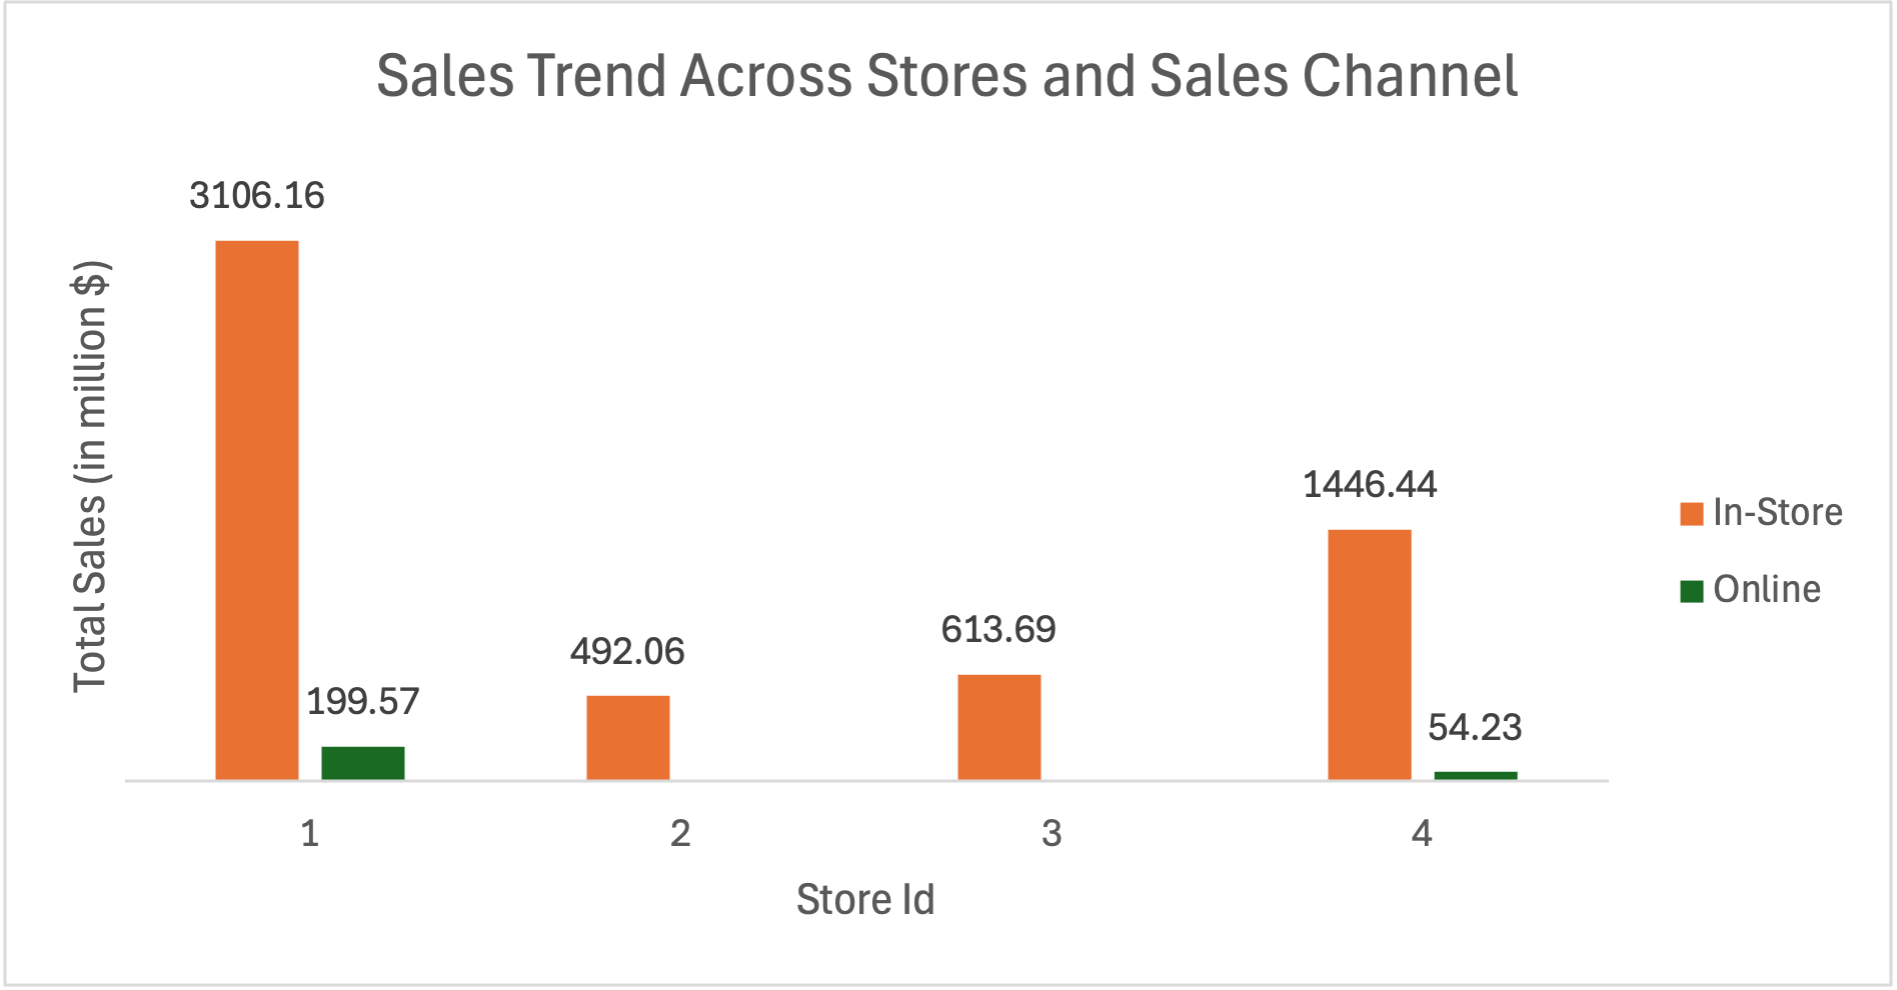

Columns involved for above graph are as follows:
- store_id
- sales_channel
- total_sales

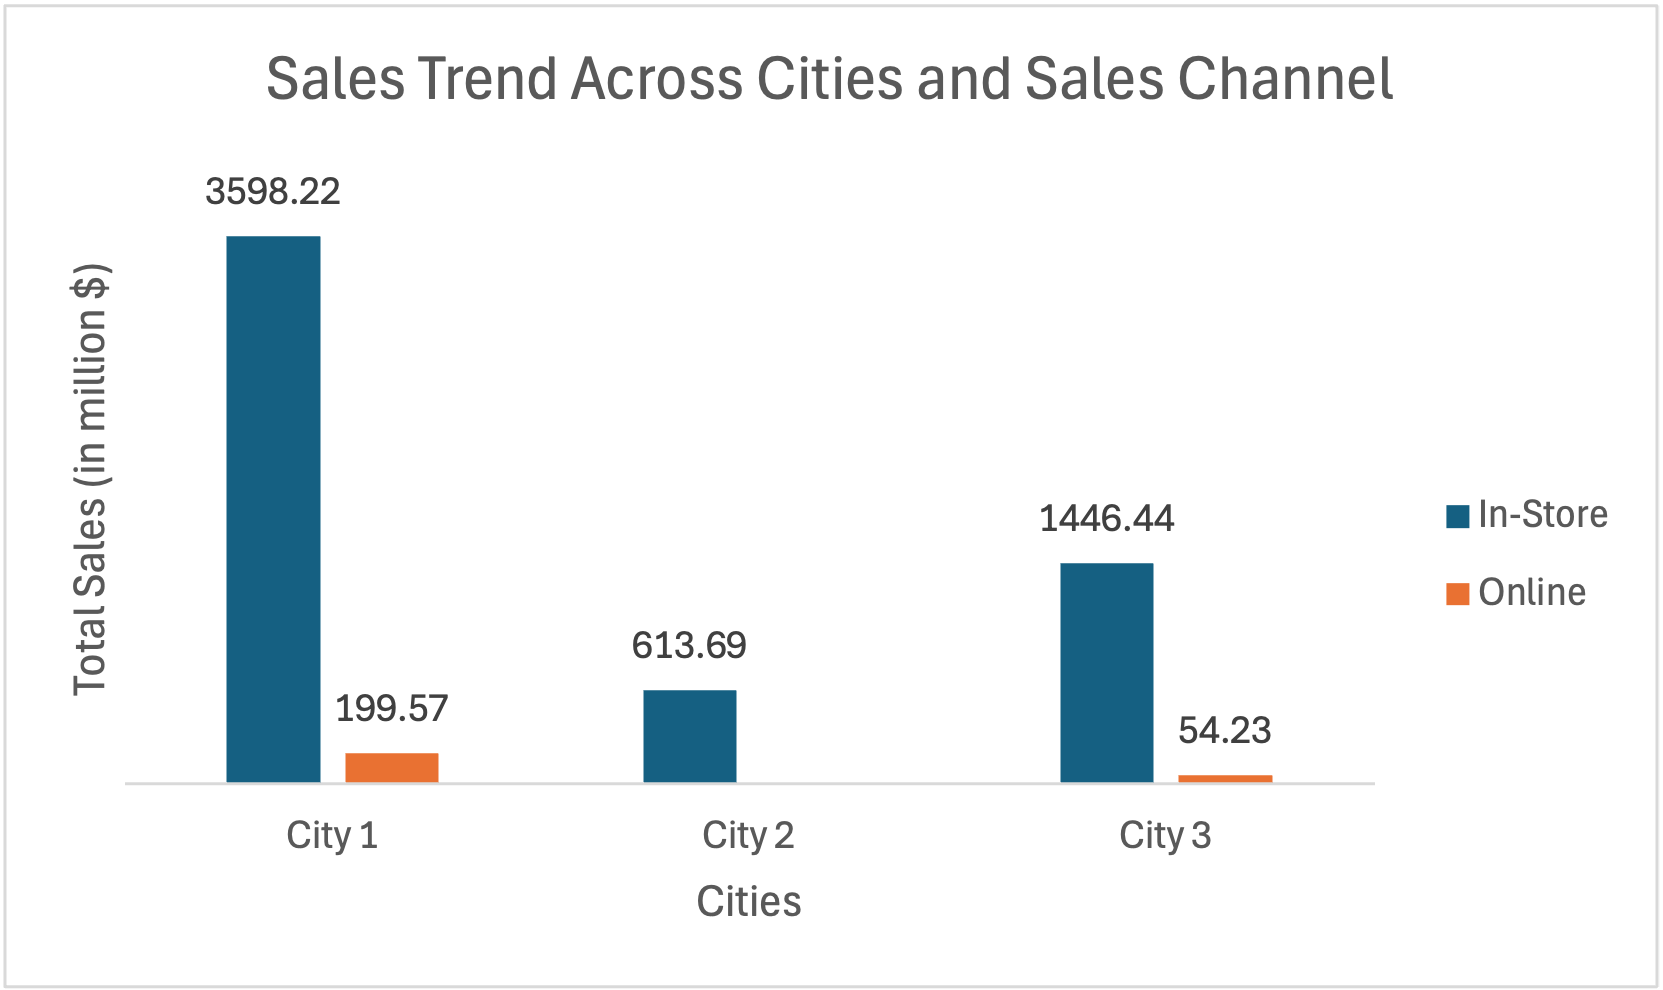

Columns involved for above graph are as follows:

- city
- sales_channel
- total_sales

**Business Question 2:**
How do online and in-store sales compare over the years?

In [46]:
%%sql

SELECT
    dd.year,
    dd.quarter,
    dsc.sales_channel,
    SUM(fc.sum_total) AS total_sales
FROM 
    fact_combined fc
JOIN 
    dim_date dd ON fc.date_key = dd.key
JOIN
    dim_sales_channel dsc ON fc.sales_channel_key = dsc.key
GROUP BY 
    dd.year,
    dd.quarter,
    dsc.sales_channel
ORDER BY 
    dd.year,
    dd.quarter,
    dsc.sales_channel;

Running query in 'postgresql://postgres@/final_project'

18 rows affected.

year,quarter,sales_channel,total_sales
2022,3,In-Store,165874047.81
2022,3,Online,9279116.83
2022,4,In-Store,493514268.91
2022,4,Online,28834268.50
2023,1,In-Store,456227570.50
2023,1,Online,30821501.53
2023,2,In-Store,474191511.68
2023,2,Online,20636135.55
2023,3,In-Store,471368225.85
2023,3,Online,18431863.46


#### **Key Insights and Implications**

##### **1. Steady Dominance of In-Store Sales Over Time**
- In-store sales consistently outpace online sales across all years and quarters. For example, in **Q2 2024**, in-store sales reached **\$1.02 billion**, whereas online sales were only **\$42.8 million**.

**Implication:**  
This indicates a strong preference for in-store shopping, possibly due to better in-person experiences, higher foot traffic, or broader product availability. The steady dominance of in-store sales may suggest that online platforms have not yet captured a comparable share of total sales.

**Future Action:**  
- Focus on enhancing the online shopping experience to drive higher conversion rates, such as implementing exclusive deals or improving the platform's usability.
- Investigate any barriers to online shopping, including product assortment, website user experience, and delivery options.
- Increase promotional efforts for online channels to encourage customer engagement and boost online sales.

##### **2. Seasonal Variations in Sales Channel Performance**
- **Q4 2022** and **Q4 2023** show a significant increase in both in-store and online sales, with in-store sales peaking at **\$667 million** in Q4 2023 and online sales reaching **\$25.4 million** in the same quarter.

**Implication:**  
Sales across both channels tend to spike during Q4, likely due to holiday shopping seasons and end-of-year promotions. The increased sales volume suggests that customers are more active in purchasing during these periods, especially for in-store shopping.

**Future Action:**  
- Leverage seasonal peaks by increasing marketing efforts during Q4, offering exclusive promotions or events both in-store and online.
- Align inventory and staffing to handle increased demand during high-sales periods, ensuring a seamless customer experience both online and in-store.
- Investigate strategies to convert more of the holiday-driven in-store sales to online sales through initiatives like "buy online, pick up in-store."

##### **3. Gradual Growth in Online Sales**
- Over the years, online sales have shown gradual growth, particularly in **Q1 2024**, where online sales reached **\$40 million**. While still significantly lower than in-store sales, the increase suggests potential for further online sales growth.

**Implication:**  
The slow but steady growth in online sales indicates a growing acceptance of e-commerce, although it still lags behind in-store shopping. This trend could be a result of improved online experiences, but there is still room for online sales to capture a larger share of overall sales.

**Future Action:**  
- Invest in optimizing the online shopping platform, focusing on user experience, faster checkout, and personalized product recommendations.
- Increase digital marketing campaigns to boost awareness and drive traffic to online channels.
- Explore strategies such as exclusive online offers, digital loyalty programs, and targeted ads to further grow online sales.

##### **Conclusion**
The data reveals a **consistent preference for in-store sales**, though there are signs of **gradual growth in online sales**, especially in recent quarters. **Seasonal sales spikes** suggest the need for strong promotional strategies during key periods. To optimize revenue, businesses should **enhance the online shopping experience**, **align seasonal promotions**, and **tailor strategies by channel** to further capture market potential both in-store and online.

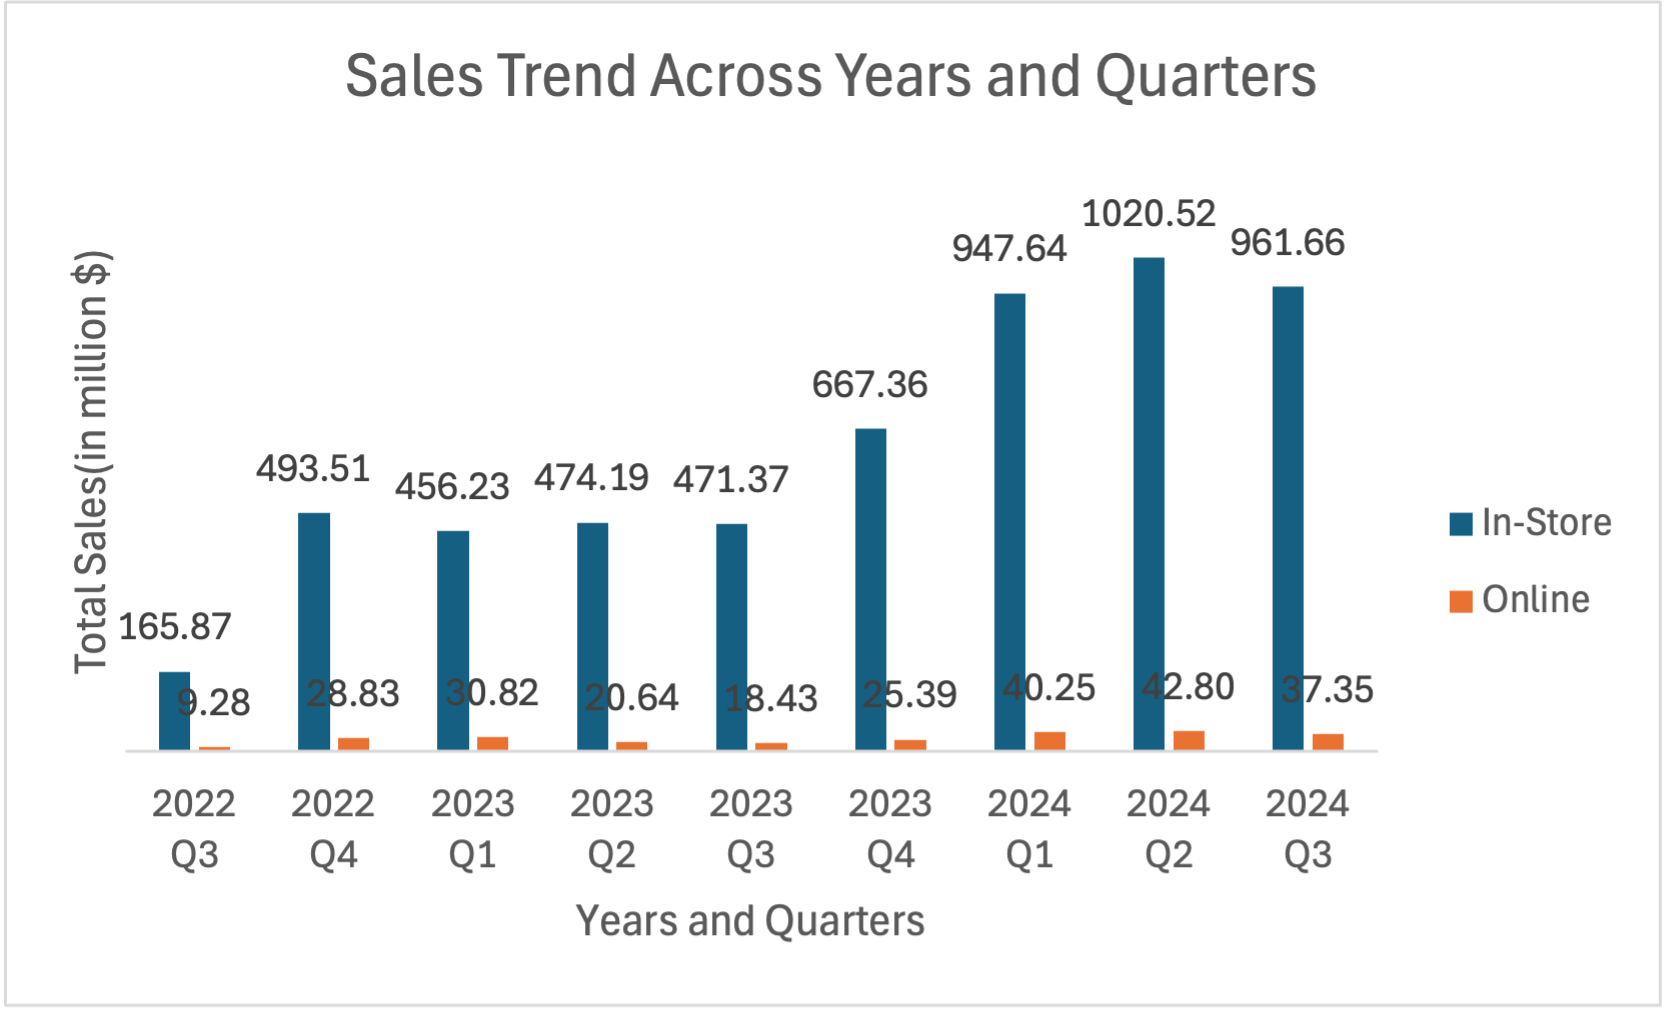

**Business Question 3:**
How did the different kinds of promotions (promo codes) perform?

In [47]:
%%sql

SELECT 
    dd.year,
    dd.quarter,
    ROUND(SUM(fm.normal_price * fm.quantity), 2) AS total_normal_sales_value,
    ROUND(SUM(fm.price * fm.quantity), 2) AS total_markdown_sales_value,
    ROUND(SUM((fm.normal_price - fm.price) * fm.quantity), 2) AS total_discount_value,
    ROUND(
        (SUM((fm.normal_price - fm.price) * fm.quantity) / 
         NULLIF(SUM(fm.normal_price * fm.quantity), 0)) * 100, 
        2
    ) AS discount_ratio_percentage
FROM 
    fact_markdown fm
JOIN 
    dim_date dd ON fm.date_key = dd.key
GROUP BY 
    dd.year,
    dd.quarter
ORDER BY 
    dd.year,
    dd.quarter;

Running query in 'postgresql://postgres@/final_project'

9 rows affected.

year,quarter,total_normal_sales_value,total_markdown_sales_value,total_discount_value,discount_ratio_percentage
2022,3,368671.83,193127.68,175544.15,47.62
2022,4,1035697.72,572135.49,463562.22,44.76
2023,1,1013493.67,567942.44,445551.23,43.96
2023,2,716097.68,406390.95,309706.73,43.25
2023,3,967143.70,546266.90,420876.80,43.52
2023,4,955692.20,567247.60,388444.60,40.65
2024,1,1218778.90,710603.00,508175.90,41.70
2024,2,1229921.80,766707.40,463214.40,37.66
2024,3,1077294.60,637321.42,439973.18,40.84


#### **Key Insights and Implications**

##### **1. Overall Downward Trend in Discount Ratio**
- The **discount ratio percentage** shows a noticeable **downward trend** over time, from **47.62% in Q3 2022** to **37.66% in Q2 2024**.  

**Implication:**  
This decline suggests a potential **improvement in pricing strategies**, where markdowns (discounts) are becoming less aggressive. It could mean better demand forecasting, less overstocking, or improved promotional planning.  

**Future Action:**  
- Analyze which products or categories have contributed to this decline to replicate success.  
- Monitor customer behavior to ensure that reduced discounts do not significantly impact sales volume.


##### **2. High Discount Ratios in Early Periods**
- The highest discount ratio (**47.62% in Q3 2022**) indicates that markdowns were substantial during the initial periods, possibly to clear excess inventory or attract customers.  

**Implication:**  
While large discounts can boost short-term sales, they may signal issues like overstocking or poor demand forecasting. Continuously high discounts can erode profit margins and reduce brand value.  

**Future Action:**  
- Review inventory management and sales forecasting processes for that period.  
- Explore alternatives to markdowns, such as targeted promotions or bundling strategies, to improve profitability.

##### **3. Seasonal Fluctuations in Discounting**
- The discount ratio shows some **seasonal or cyclical patterns**. For example:  
  - **Q1 and Q2 of 2024** have lower discount ratios (**41.70% and 37.66%**) compared to other periods.  
  - Higher markdowns (e.g., **Q4 2022 at 44.76%**) may align with end-of-year clearance events or holiday seasons.  

**Implication:**  
Discounting behavior is influenced by seasonal demand fluctuations, inventory management, and promotional calendars.  

**Future Action:**  
- Align discounting strategies with seasonal demand to minimize markdowns.  
- Use data-driven demand forecasting to reduce overstock and avoid aggressive end-of-season discounts.

##### **Conclusion**
The **downward trend in discount ratios** reflects positive progress in markdown optimization. However, there’s an opportunity to further refine **inventory management**, **demand forecasting**, and **promotional strategies** to sustain profits while minimizing excessive markdowns.

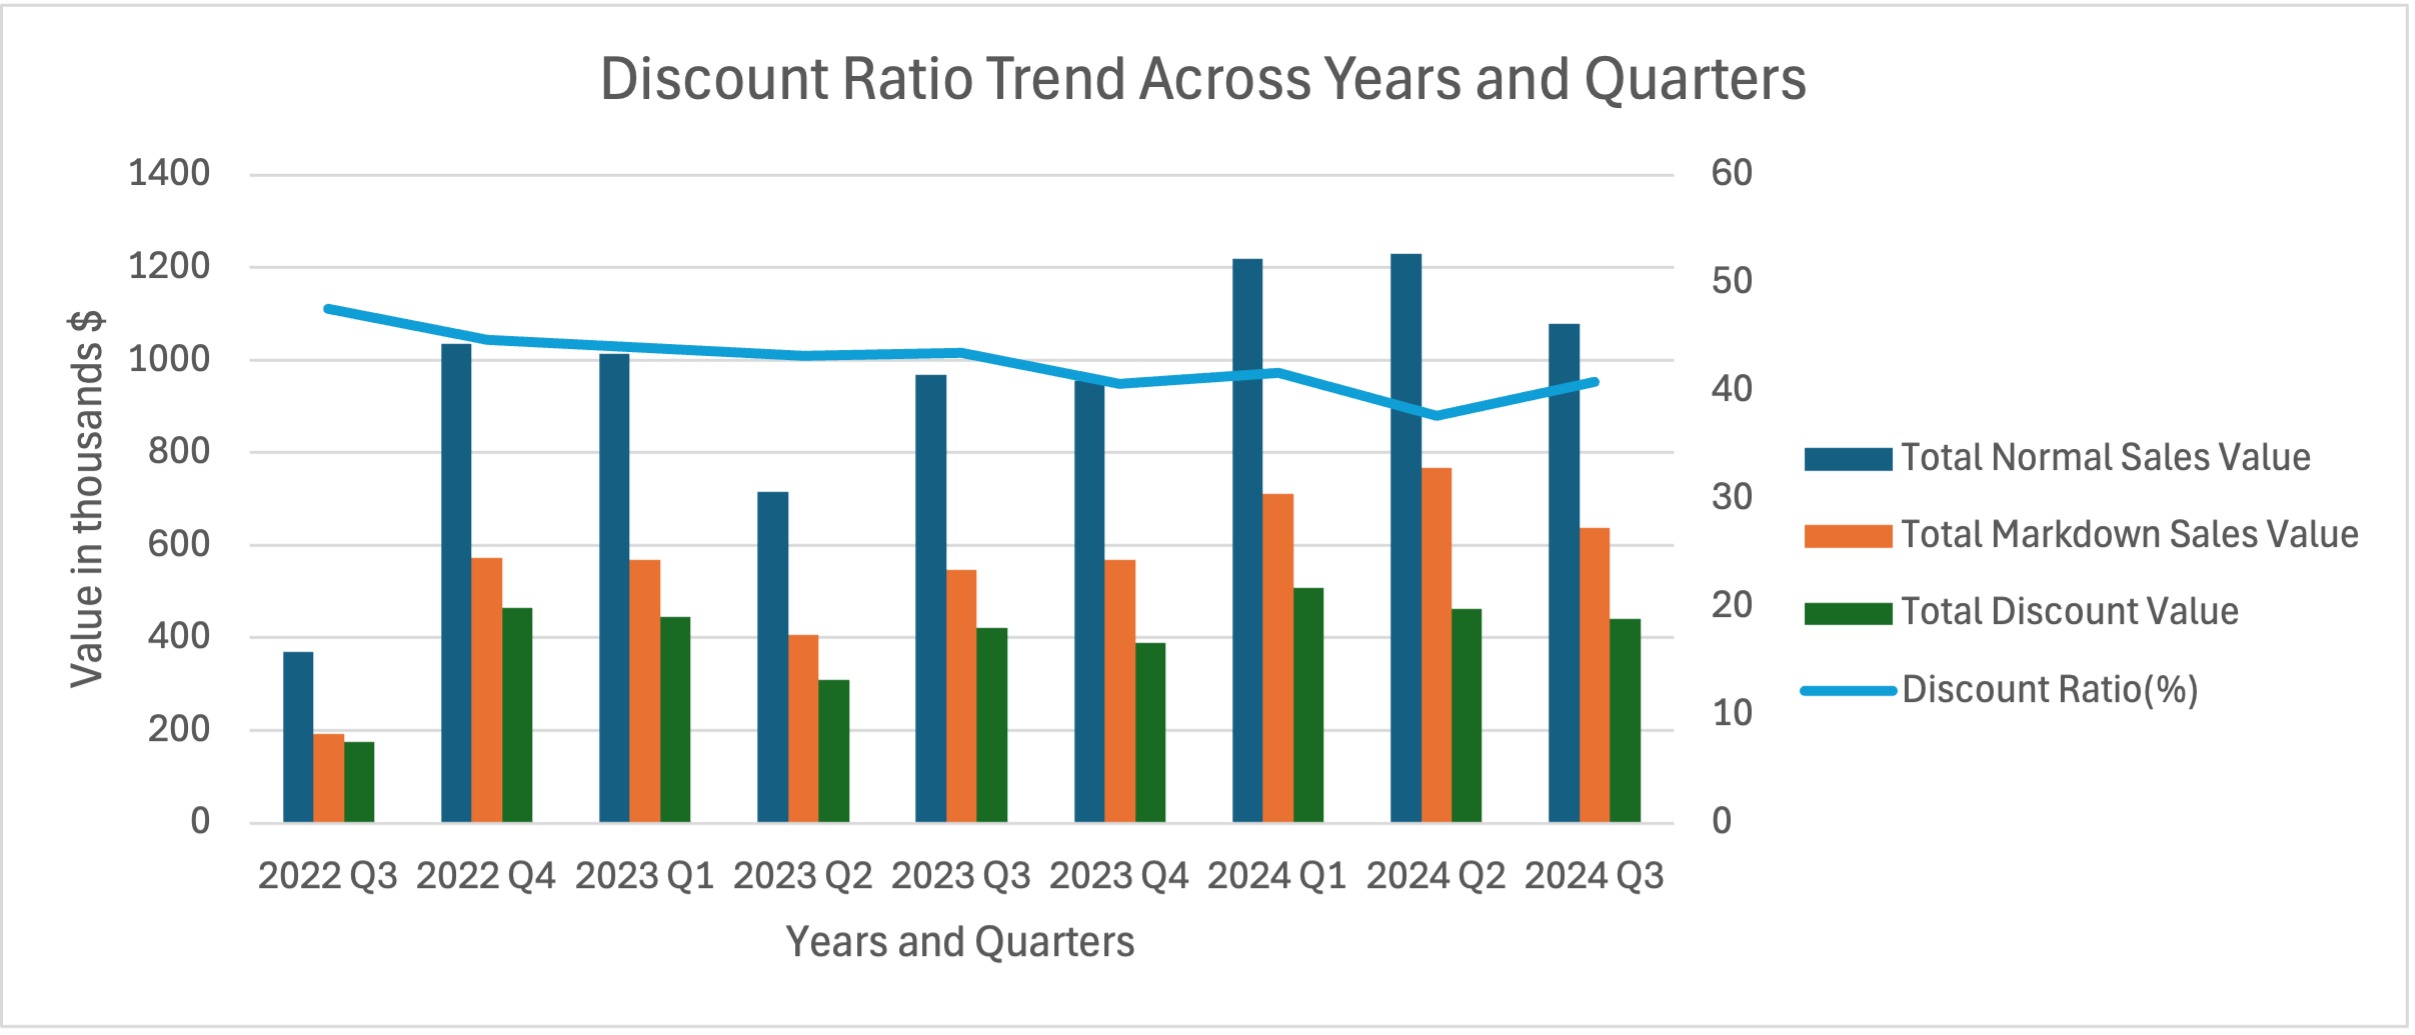